# Lucia Depaoli
# 2016960

# Ex 1
The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t =
10$ s) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during
consecutive time intervals is: $4$, $1$, $3$, $1$ and $3$.

### 1.1 
Suppose a uniform prior distribution for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

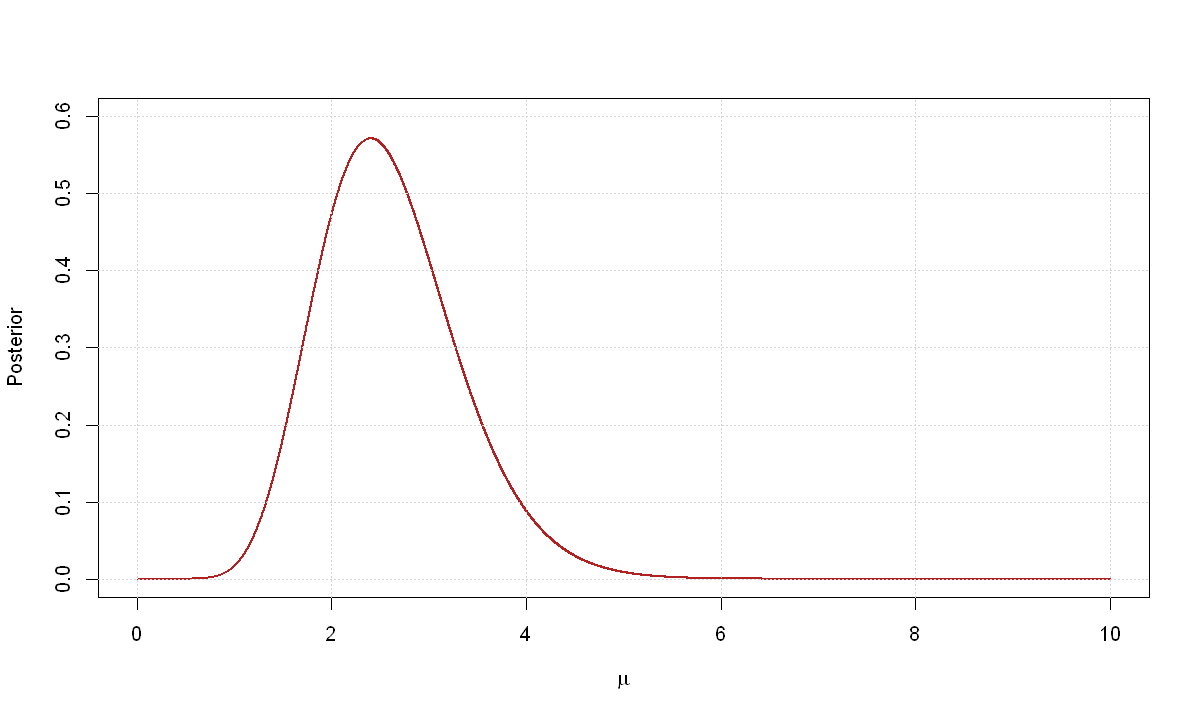

In [1]:
D <- c(4,1,3,1,3)
N <- length(D)

mu <- seq(0, 10, by = 0.001)
n <- length(mu)
delta_mu <- 1/n

posterior_unif <- dgamma(x = mu, shape = sum(D) + 1, rate = N)

options(repr.plot.width = 10, repr.plot.height = 6)

plot(mu, posterior_unif, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior", xlab= expression(mu) , xlim=c(0,10), ylim=c(0,0.6))
grid()

In [2]:
mediana <- function(post, delta, n, mu) {
    area <- 0
    for (i in 1:n){
        k <- i
        area <- area + sum(post[i])/sum(post)
        if(area >= 1/2) {
                break
                      }
            }
    return(mu[i])
}

# analytically
mean_unif <- (sum(D) + 1) / N
var_unif <- (sum(D) + 1) / N^2
cat('Analytically Mean: ',mean_unif,'\n')
cat('Analytically Variance: ',var_unif,'\n')

#numerically
mean_unif <- sum(mu*posterior_unif)/sum(posterior_unif)
var_unif <- sum((mu^2)*posterior_unif/sum(posterior_unif)) - mean_unif^2
med_unif <- mediana(post = posterior_unif, delta = delta_mu, n = n, mu = mu)
cat('Numerically Mean: ',mean_unif,'\n')
cat('Numerically Variance: ',var_unif,'\n')
cat('Numerically Median: ',med_unif,'\n')

Analytically Mean:  2.6 
Analytically Variance:  0.52 
Numerically Mean:  2.6 
Numerically Variance:  0.52 
Numerically Median:  2.534 


### 1.2
Suppose a Jeffrey's prior for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

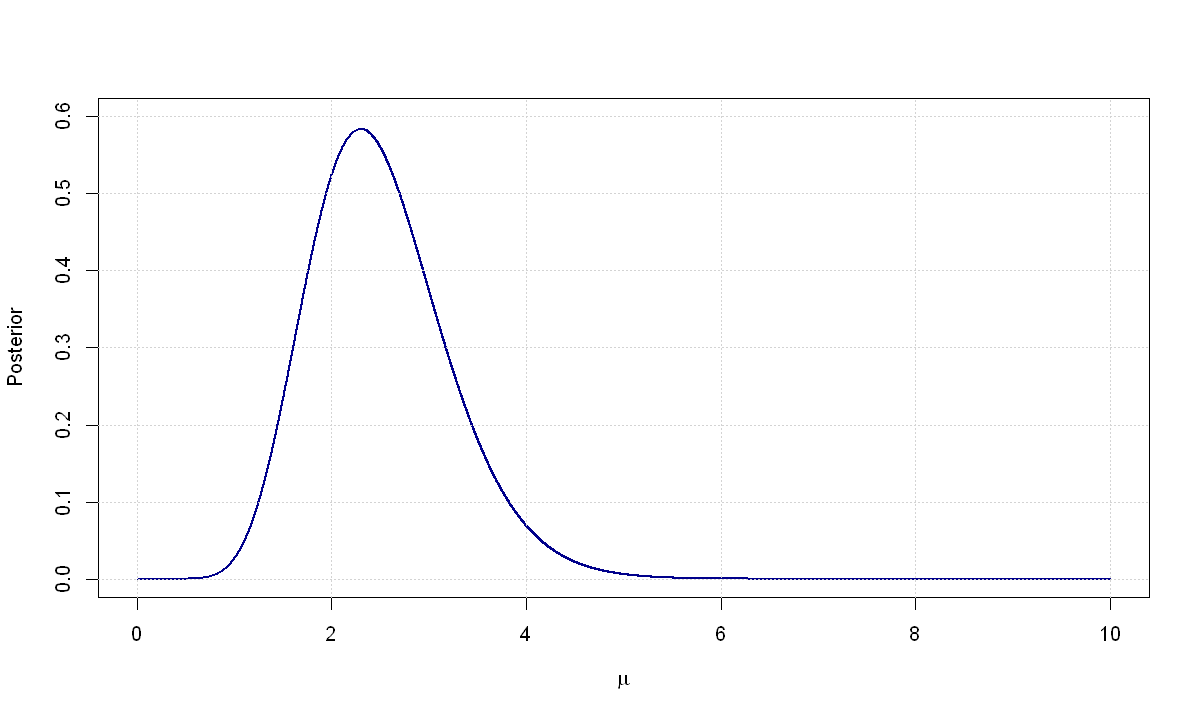

In [3]:
posterior_jeff <- dgamma(x = mu, shape = sum(D) + 1/2, rate = N)

plot(mu, posterior_jeff, type="l", col="blue4",lwd=2,lty=1, 
     ylab="Posterior", xlab= expression(mu), xlim=c(0,10), ylim=c(0,0.6))
grid()

In [4]:
# analytically
mean_jeff <- (sum(D) + 1) / N
var_jeff <- (sum(D) + 1) / N^2
cat('Analytically Mean: ',mean_jeff,'\n')
cat('Analytically Variance: ',var_jeff,'\n')

#numerically
mean_jeff <- sum(mu*posterior_jeff)/sum(posterior_jeff)
var_jeff <- sum((mu^2)*posterior_jeff/sum(posterior_jeff)) - mean_jeff^2
med_jeff <- mediana(post = posterior_jeff, delta = delta_mu, n = n, mu = mu)
cat('Numerically Mean: ',mean_jeff,'\n')
cat('Numerically Variance: ',var_jeff,'\n')
cat('Numerically Median: ',med_jeff,'\n')

Analytically Mean:  2.6 
Analytically Variance:  0.52 
Numerically Mean:  2.5 
Numerically Variance:  0.5 
Numerically Median:  2.434 


### 1.3
Evaluate a $95$% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation.

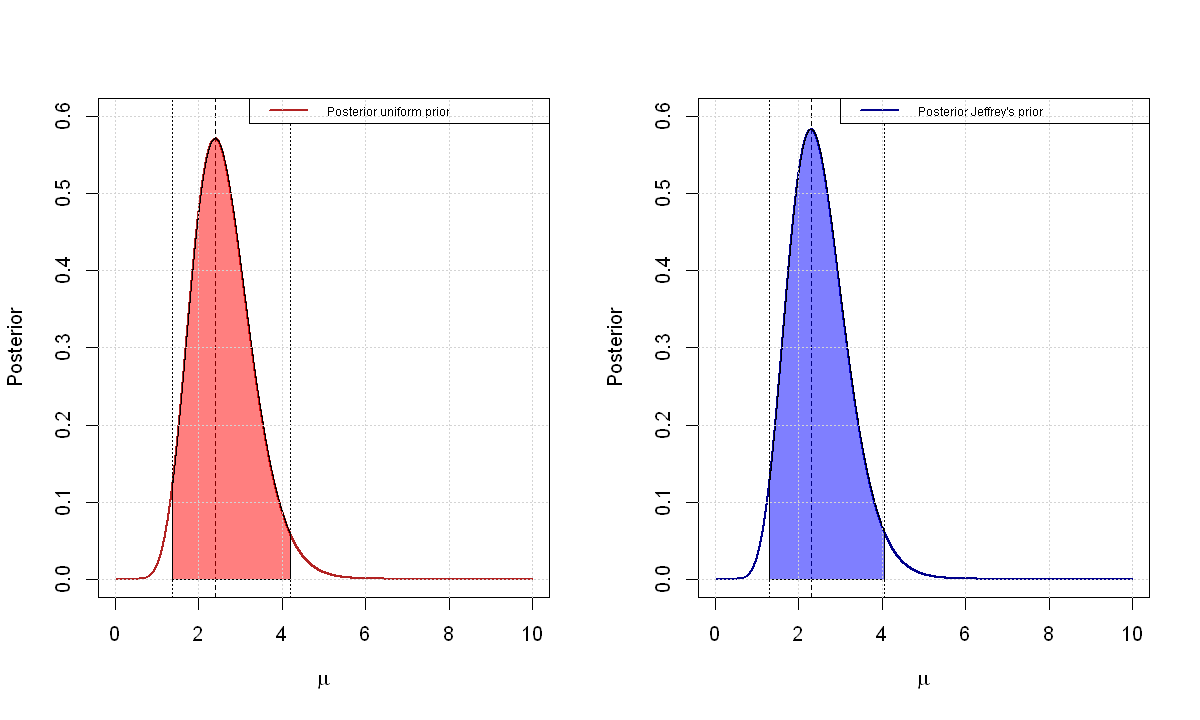

In [5]:
x1_unif <- mu[tail(which(cumsum(posterior_unif)/sum(posterior_unif) < 0.025),1)]
x2_unif <- mu[tail(which(cumsum(posterior_unif)/sum(posterior_unif) < 1- 0.025),1)]
xmax_unif <- mu[which.max(posterior_unif)]
 
x1_jeff <- mu[tail(which(cumsum(posterior_jeff)/sum(posterior_jeff) < 0.025),1)]
x2_jeff <- mu[tail(which(cumsum(posterior_jeff)/sum(posterior_jeff) < 1- 0.025),1)]
xmax_jeff <- mu[which.max(posterior_jeff)]

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))

plot(mu, posterior_unif, type="l",col="firebrick",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1_unif, lty=3,col='black')
abline(v=x2_unif, lty=3,col='black')
abline(v=xmax_unif, lty=2,col='black')
legend("topright", "Posterior uniform prior", col='firebrick',
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=x1_unif & mu<=x2_unif], x2_unif, x1_unif), c(posterior_unif[mu>=x1_unif & mu<=x2_unif], 0, 0),
        col=rgb(1,0,0,0.5))
grid()

plot(mu, posterior_jeff, type="l",col="blue4",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1_jeff, lty=3,col='black')
abline(v=x2_jeff, lty=3,col='black')
abline(v=xmax_jeff, lty=2,col='black')
legend("topright", "Posterior Jeffrey's prior", col='blue4',
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=x1_jeff & mu<=x2_jeff], x2_jeff, x1_jeff), c(posterior_jeff[mu>=x1_jeff & mu<=x2_jeff], 0, 0),
        col=rgb(0,0,1,0.5))
grid()

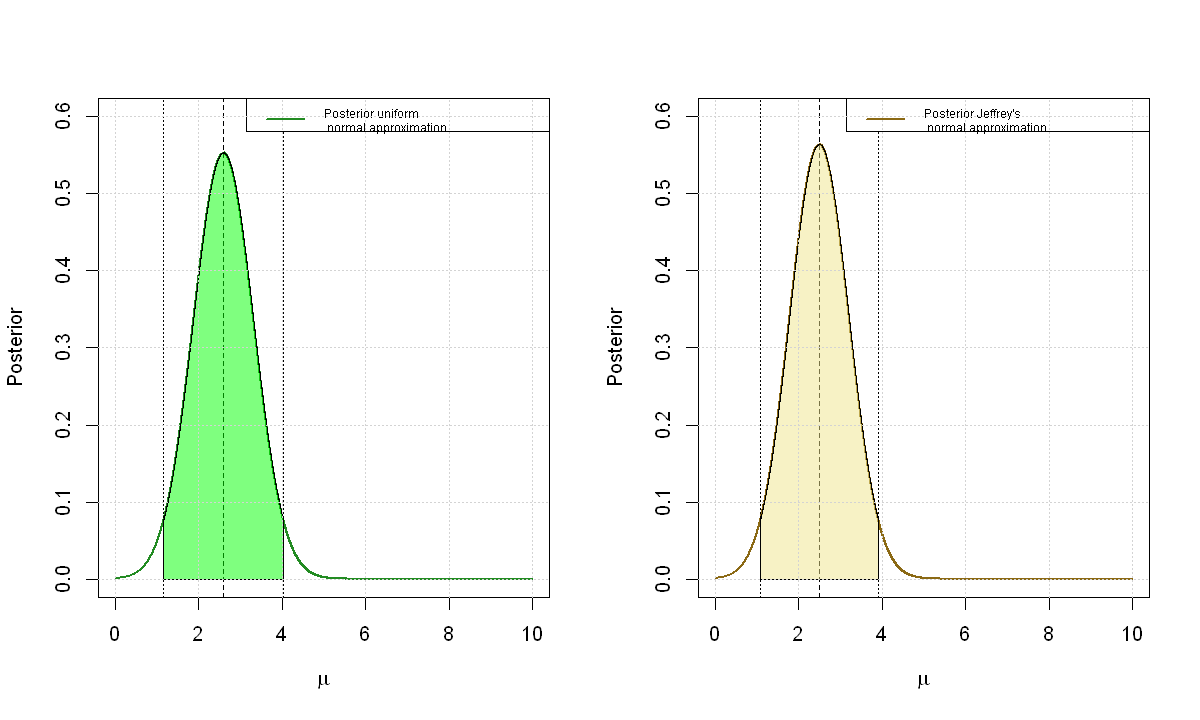

In [6]:
posterior_unif_normal <- dnorm(x = mu, mean = mean_unif, sd = sqrt(var_unif))
posterior_jeff_normal <- dnorm(x = mu, mean = mean_jeff, sd = sqrt(var_jeff))

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))

plot(mu, posterior_unif_normal, type="l",col="forestgreen",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab=expression(mu))
abline(v=mean_unif-2*sqrt(var_unif), lty=3,col='black')
abline(v=mean_unif+2*sqrt(var_unif), lty=3,col='black')
abline(v=mean_unif, lty=2,col='black')
legend("topright", "Posterior uniform \n normal approximation", col='forestgreen',
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=mean_unif-2*sqrt(var_unif) & mu<=mean_unif+2*sqrt(var_unif)], mean_unif+2*sqrt(var_unif),
          mean_unif-2*sqrt(var_unif)),
        c(posterior_unif_normal[mu>=mean_unif-2*sqrt(var_unif) & mu<=mean_unif+2*sqrt(var_unif)], 0, 0),
        col=rgb(0,1,0,0.5))
grid()

plot(mu, posterior_jeff_normal, type="l",col="goldenrod4",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab=expression(mu))
abline(v=mean_jeff-2*sqrt(var_jeff), lty=3,col='black')
abline(v=mean_jeff+2*sqrt(var_jeff), lty=3,col='black')
abline(v=mean_jeff, lty=2,col='black')
legend("topright", "Posterior Jeffrey's \n normal approximation", col='goldenrod4',
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=mean_jeff-2*sqrt(var_jeff) & mu<=mean_jeff+2*sqrt(var_jeff)], mean_jeff+2*sqrt(var_jeff),
          mean_jeff-2*sqrt(var_jeff)),
        c(posterior_jeff_normal[mu>=mean_jeff-2*sqrt(var_jeff) & mu<=mean_jeff+2*sqrt(var_jeff)], 0, 0),
        col=rgb(240/255,230/255,140/255,0.5))
grid()

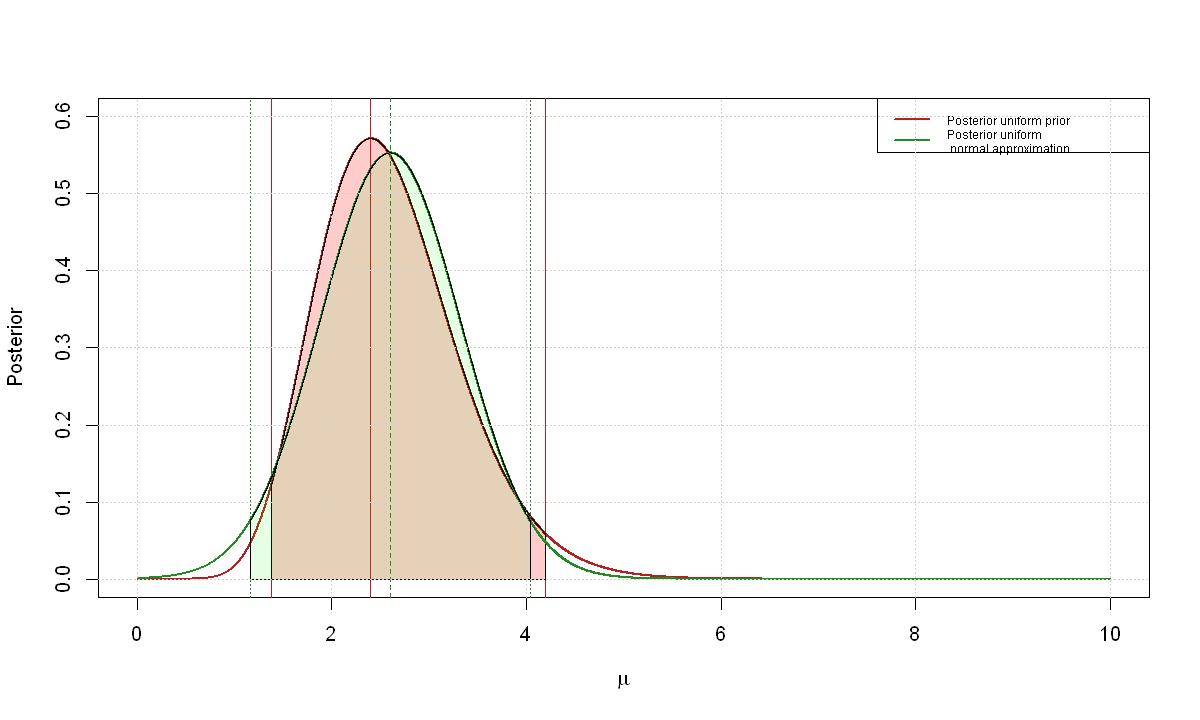

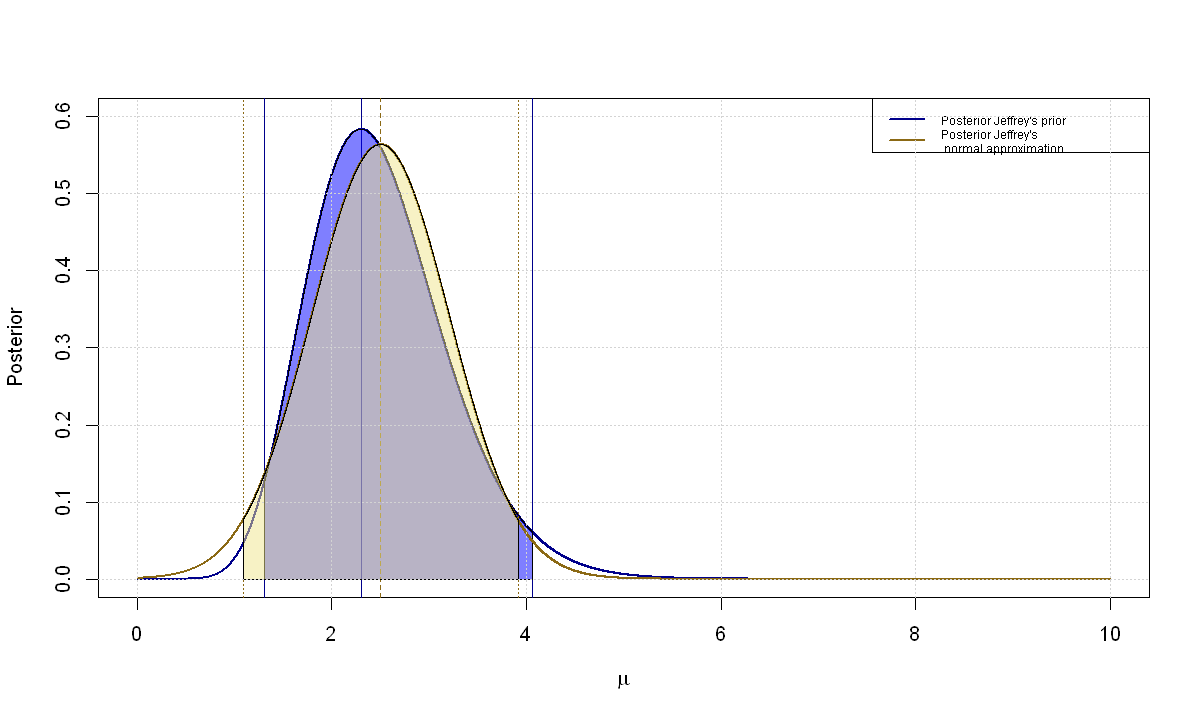

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,1))

plot(mu, posterior_unif, type="l",col="firebrick",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1_unif, lty=1,col='firebrick')
abline(v=x2_unif, lty=1,col='firebrick')
abline(v=xmax_unif, lty=1,col='firebrick')
polygon(c(mu[mu>=x1_unif & mu<=x2_unif], x2_unif, x1_unif), c(posterior_unif[mu>=x1_unif & mu<=x2_unif], 0, 0),
        col=rgb(1,0,0,0.2))

lines(mu, posterior_unif_normal, type="l",col="forestgreen",lwd=2,lty=1)
abline(v=mean_unif-2*sqrt(var_unif), lty=3,col='forestgreen')
abline(v=mean_unif+2*sqrt(var_unif), lty=3,col='forestgreen')
abline(v=mean_unif, lty=2,col='forestgreen')
legend("topright", c( "Posterior uniform prior", "Posterior uniform \n normal approximation"), col=c('firebrick','forestgreen'),
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=mean_unif-2*sqrt(var_unif) & mu<=mean_unif+2*sqrt(var_unif)], mean_unif+2*sqrt(var_unif),
          mean_unif-2*sqrt(var_unif)),
        c(posterior_unif_normal[mu>=mean_unif-2*sqrt(var_unif) & mu<=mean_unif+2*sqrt(var_unif)], 0, 0),
        col=rgb(0,1,0,0.1))
grid()

plot(mu, posterior_jeff, type="l",col="blue4",lwd=2,lty=1,ylim=c(0,0.6), xlim=c(0,10),
    ylab="Posterior", xlab= expression(mu))
abline(v=x1_jeff, lty=1,col='blue4')
abline(v=x2_jeff, lty=1,col='blue4')
abline(v=xmax_jeff, lty=1,col='blue4')
polygon(c(mu[mu>=x1_jeff & mu<=x2_jeff], x2_jeff, x1_jeff), c(posterior_jeff[mu>=x1_jeff & mu<=x2_jeff], 0, 0),
        col=rgb(0,0,1,0.5))

lines(mu, posterior_jeff_normal, type="l",col="goldenrod4",lwd=2,lty=1)
abline(v=mean_jeff-2*sqrt(var_jeff), lty=3,col='goldenrod4')
abline(v=mean_jeff+2*sqrt(var_jeff), lty=3,col='goldenrod4')
abline(v=mean_jeff, lty=2,col='goldenrod4')
legend("topright", c("Posterior Jeffrey's prior", "Posterior Jeffrey's \n normal approximation"), col=c('blue4','goldenrod4'),
       lwd=2, lty=1,cex = 0.6)
polygon(c(mu[mu>=mean_jeff-2*sqrt(var_jeff) & mu<=mean_jeff+2*sqrt(var_jeff)], mean_jeff+2*sqrt(var_jeff),
          mean_jeff-2*sqrt(var_jeff)),
        c(posterior_jeff_normal[mu>=mean_jeff-2*sqrt(var_jeff) & mu<=mean_jeff+2*sqrt(var_jeff)], 0, 0),
        col=rgb(240/255,230/255,140/255,0.5))
grid()

# Ex 2
Given the problem of the lightouse discussed last week, study the case in which both the position
along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

In [8]:
set.seed(123)
library(SciViews)

alpha_true <- 7
beta_true <- 5
n <- 500
theta_k <- runif(1000, -pi/2, pi/2)
x_k <- beta_true * tan(theta_k) + alpha_true

log_posterior <- function(x, alpha, beta){
    return (sum(ln(beta/(pi*(beta^2+(x-alpha)^2)))))
}

Warning message:
"package 'SciViews' was built under R version 3.6.3"

Function that evaluates the grid for $\alpha$ and $\beta$ having the number of detected points N and the true position as parameters. $n$ is the resolution of the grid.

In [9]:
lighthouse <- function(N, alpha_true, beta_true, n = 500){
    x_k <- x_k[1:N]
    alpha <- seq(0,20, length.out = n)
    beta <- seq(0,20, length.out = n)
    
    z <- matrix(data = NA , nrow = n, ncol = n)
    for(j in 1:n) {
        for(k in 1:n) {
            z[j,k] <- log_posterior(x_k, alpha[j], beta[k])
                        }
                    }
    z <- z - max(z)
    
    contour(alpha, beta, exp(z), nlevels = 10, xlim = c(0, 20), ylim = c(0,20), xlab = expression(alpha),
    ylab = expression(beta), col = 'blue4', main = paste("Posterior for",N,"samples"))
    points(alpha_true, beta_true, pch = 4, col ='firebrick', lwd = 2)
    grid()
    
}

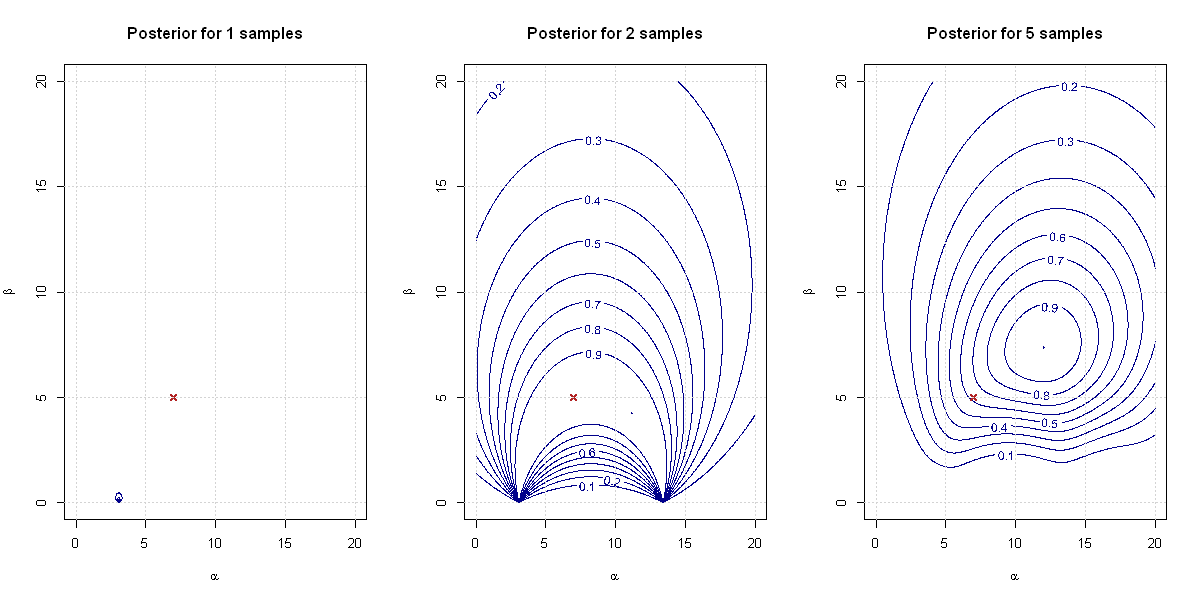

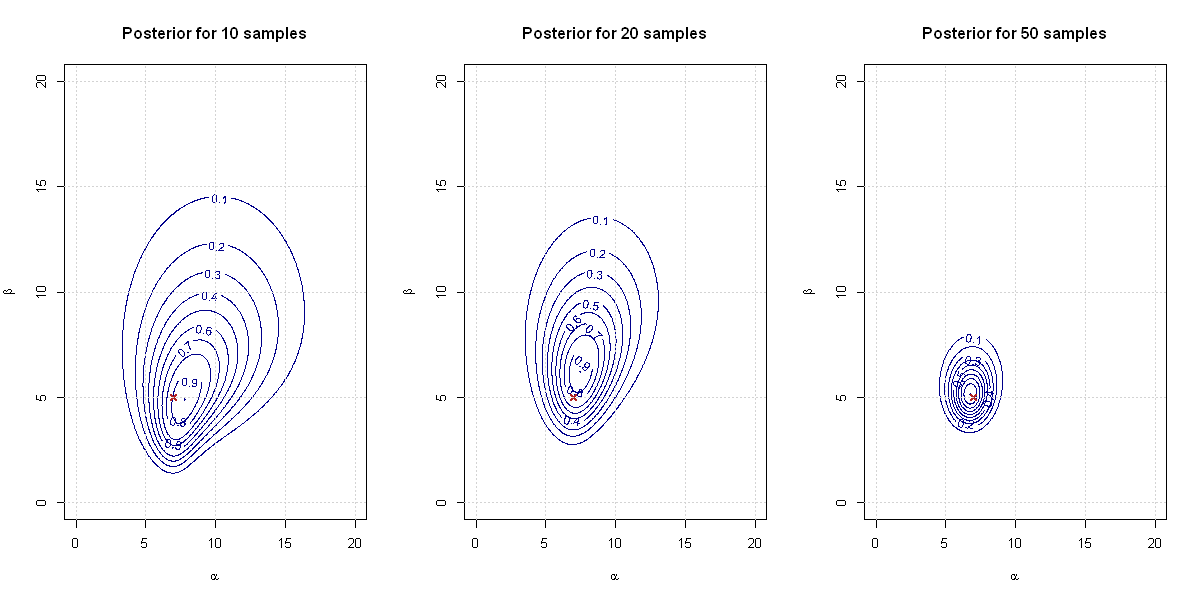

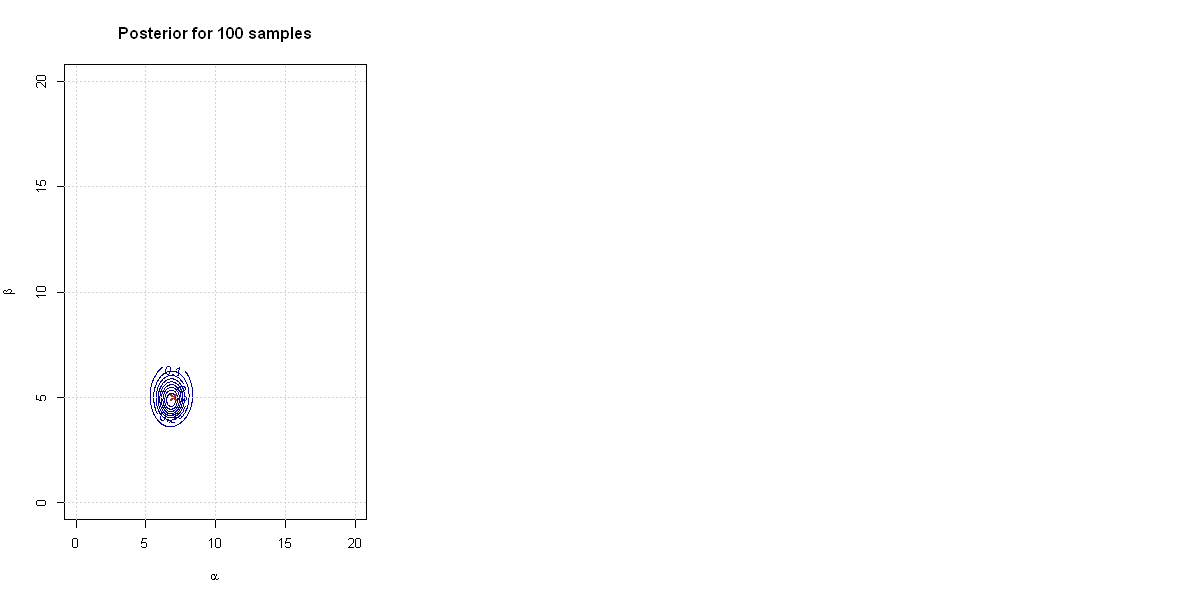

In [10]:
par(mfrow=c(1,3))
options(repr.plot.width = 10, repr.plot.height = 5)
N <- c(1, 2, 5, 10, 20, 50, 100)
for (i in 1:length(N)){
    lighthouse(N = N[i], alpha_true = alpha_true, beta_true = beta_true)
    }

# Ex 3
Given the Signal over Background example discussed last week, analyze and discuss the following
cases:

### 3.1
Vary the sampling resolution of used to generate the data, keeping the same sampling range
- change the resolution $w = 0.1, 0.25, 1, 2, 3$
- check the effect on the results

In [11]:
signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
    }

log_post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf )} # the effect of the prior
    sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log=TRUE))
}

Function used to evaluate signal-background for different values of resolution.

In [12]:
signal_background <- function(w0, A.true, B.true){
    
    x0 <- 0
    w <- 1
    Delta.t <- 5
    
    A_score = NULL
    B_score = NULL
    
    for (i in 1:length(w0)){

        xdat <- seq(from=-7*w, to=7*w, by=0.5*w0[i])
        true_signal <- signal(xdat, A.true, B.true, x0, w, Delta.t)
        ddat <- rpois(length(true_signal), true_signal)
        N <- length(ddat)
        xdat.off <- xdat -0.25

        par(mfrow=c(1,2))
        options(repr.plot.width = 12, repr.plot.height = 6)

        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w0[i])
        splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
        plot(xplot , splot, , type="l",col="blue4",lwd=2,lty=1,
        xlab="x", ylab="Signal+Background counts", xlim=range(xplot), ylim=range(c(splot, ddat)))
        lines(xdat.off, ddat , type='s',col = rgb(red = 1, green = 0, blue = 0, alpha = 0.5),
        lwd=2,lty=1)

        legend("topright", c("True signal", "Simulated data"), col=c('blue4','firebrick3'),
           lwd=2, lty=1, cex = 0.6)
        grid()

        n <- 500
        a <- seq(0,5, length.out = n)
        b <- seq(0,5, length.out = n)

        z <- matrix(data = NA , nrow = n, ncol = n)
            for(j in 1:n) {
                for(k in 1:n) {
                    z[j,k] <- log_post(ddat,xdat, a[j], b[k], x0, w, Delta.t)
                                }
                            }
        z <- z - max(z)

        contour(a, b, exp(z),nlevels = 5, xlim = c(1,3), ylim = c(0,2), xlab="amplitude, A",
        ylab='background, B', col='blue4', main = paste("Posterior for resolution w0 = ",w0[i]))
        points(A.true, B.true, pch=4, col='firebrick', lwd=2)
        grid()

        # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
        # by summing over other parameter. Normalize by gridding.
        delta_a <- diff(c(0,10))/ n
        delta_b <- diff(c(0,10))/ n
        p_a_D <- apply(exp(z), 1, sum) #sum over rows
        p_a_D <- p_a_D/(delta_a * sum(p_a_D))
        p_b_D <- apply(exp(z), 2, sum) # sum over columns
        p_b_D <- p_b_D/(delta_b * sum(p_b_D))

        mean_a <- delta_a * sum(a * p_a_D)
        mean_b <- delta_b * sum(b * p_b_D)
        sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) )
        sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )

        za_test = (mean_a - A.true)/sd_a
        zb_test = (mean_b - B.true)/sd_b
        A_score = c(A_score, za_test)
        B_score = c(B_score, zb_test)


        # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
        # using true values of conditioned parameters. Vectorize(func , par)
        # makes a vectorized function out of func in the parameter par.
        p_a_bD <- exp( Vectorize (log_post , "a")(ddat , xdat , a, B.true ,
        x0, w, Delta.t))
        p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
        p_b_aD <- exp( Vectorize (log_post , "b")(ddat , xdat , A.true , b,
        x0, w, Delta.t))
        p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

        par(mfrow=c(1,2))
        options(repr.plot.width = 12, repr.plot.height = 6)

        # Plot the 1D marginalized posteriors
        plot(b, p_b_D, xlab="background, B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
        type="l", lwd=2,col = 'black', lty = 1)
        lines(b, p_b_aD , lwd=2, lty=2, col = 'gray47')
        abline(v=B.true , lwd = 2, lty=1, col="red")
        legend("topright", c("P(B | D)", "P(B | A,D)", 'B true'), col=c('black','gray47', 'red'),
        lwd=2, lty=c(1,2, 1),cex = 0.6)
        grid()

        plot(a, p_a_D, xlab="amplitude, A", yaxs="i",
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
        type="l", lwd=2,col = 'black')
        lines(a, p_a_bD , lwd=2, lty=2, col = 'gray47')
        abline(v=A.true , lty=1, col="red", lwd = 2)
        legend("topright", c("P(A | D)", "P(A | B,D)" , 'A true'), col=c('black','gray47', 'red'),
        lwd=2, lty=c(1,2,1),cex = 0.6)
        grid()
        }
        
    plot(w0, A_score, type="l",col="firebrick",lwd=2,lty=1,
    ylab="Z normalized", xlab = 'w0')
    grid()
    plot(w0, B_score, type="l",col="blue4",lwd=2,lty=1,
    ylab="Z normalized", xlab = 'w0')
    grid()
}

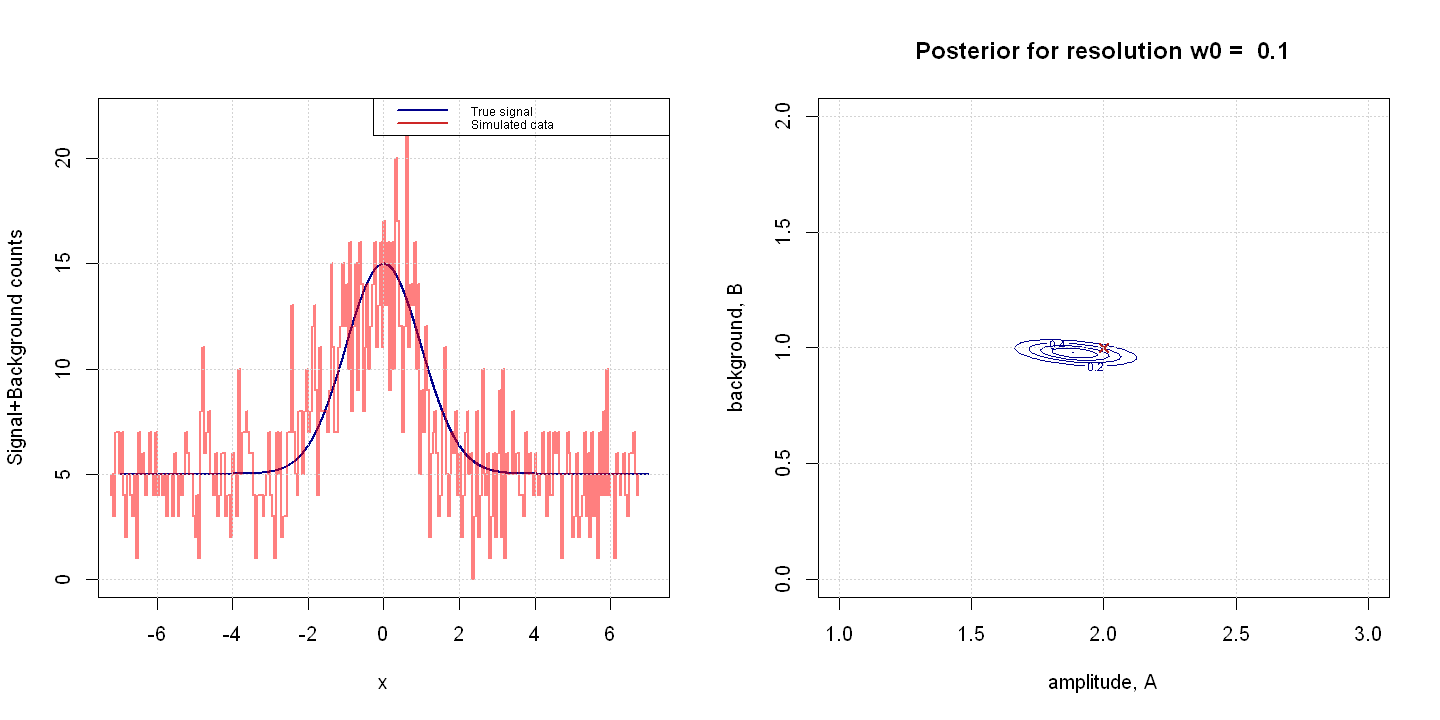

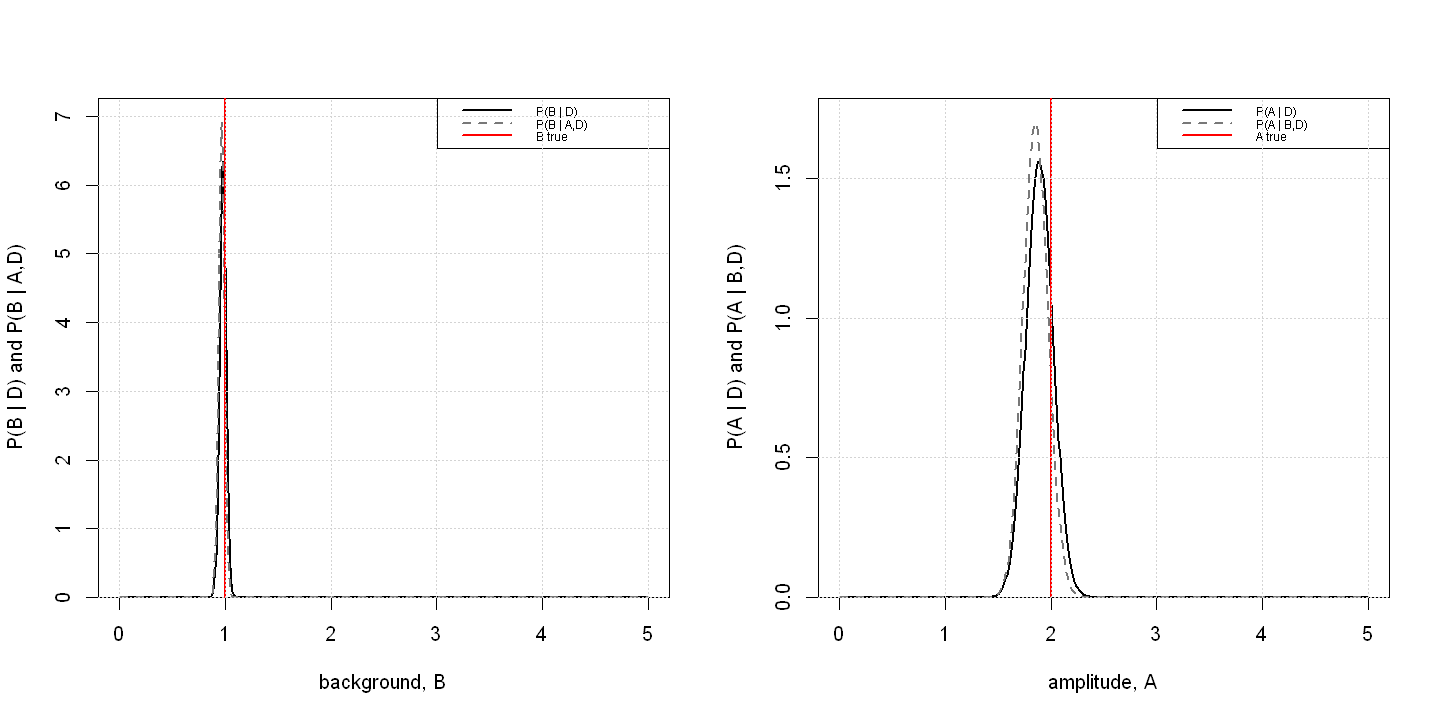

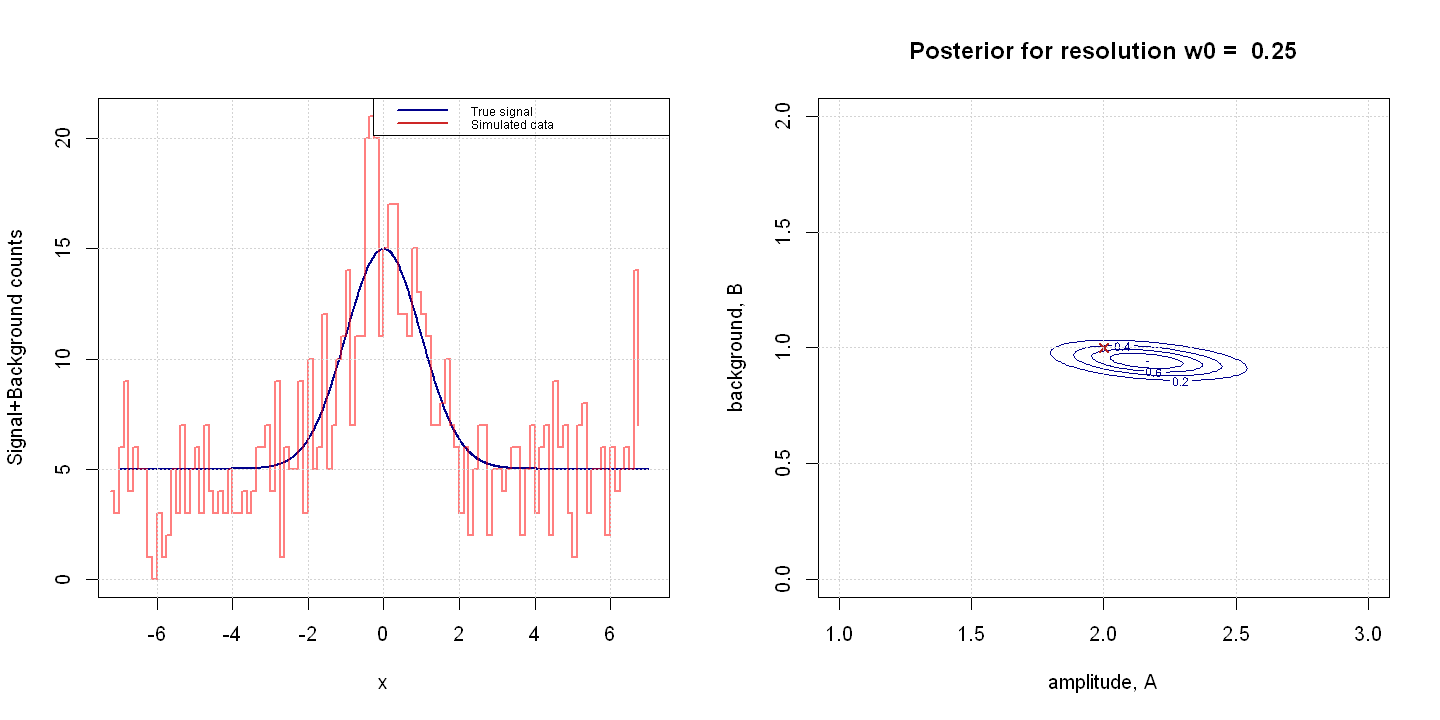

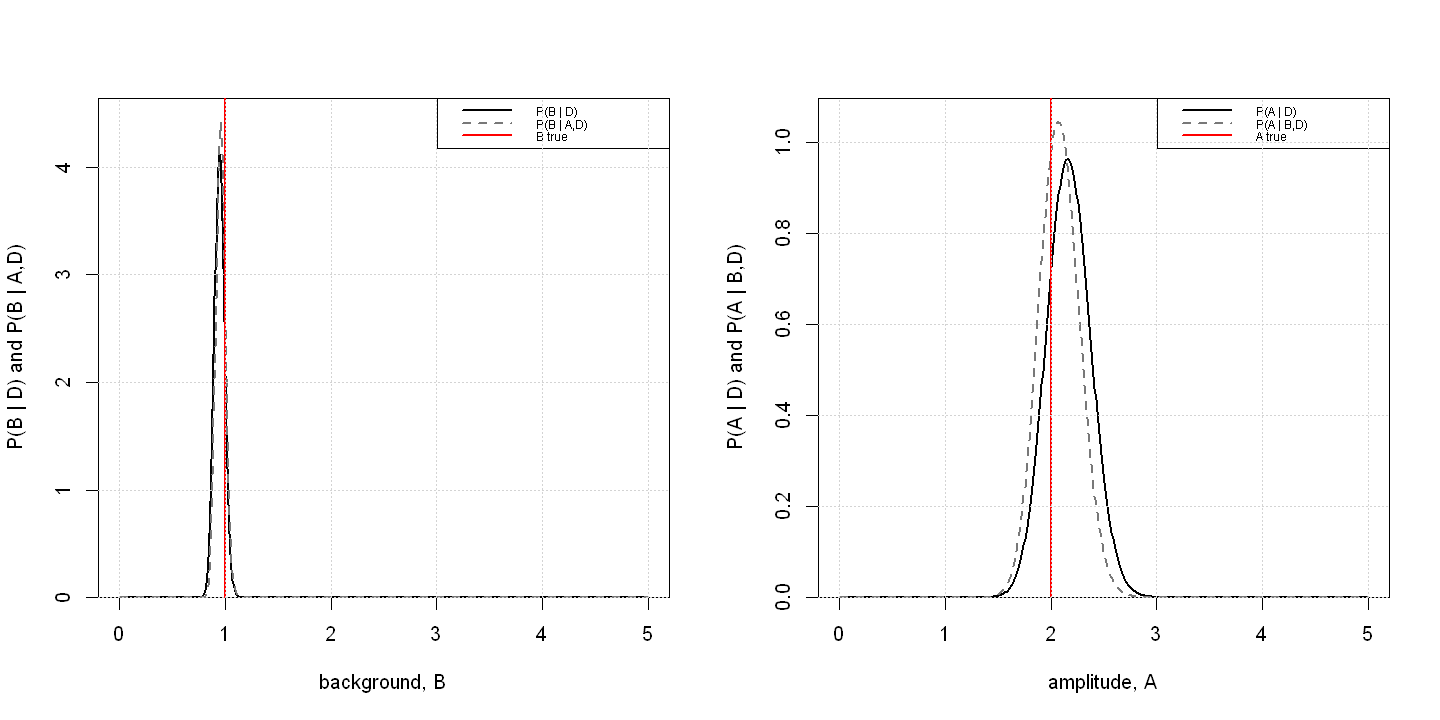

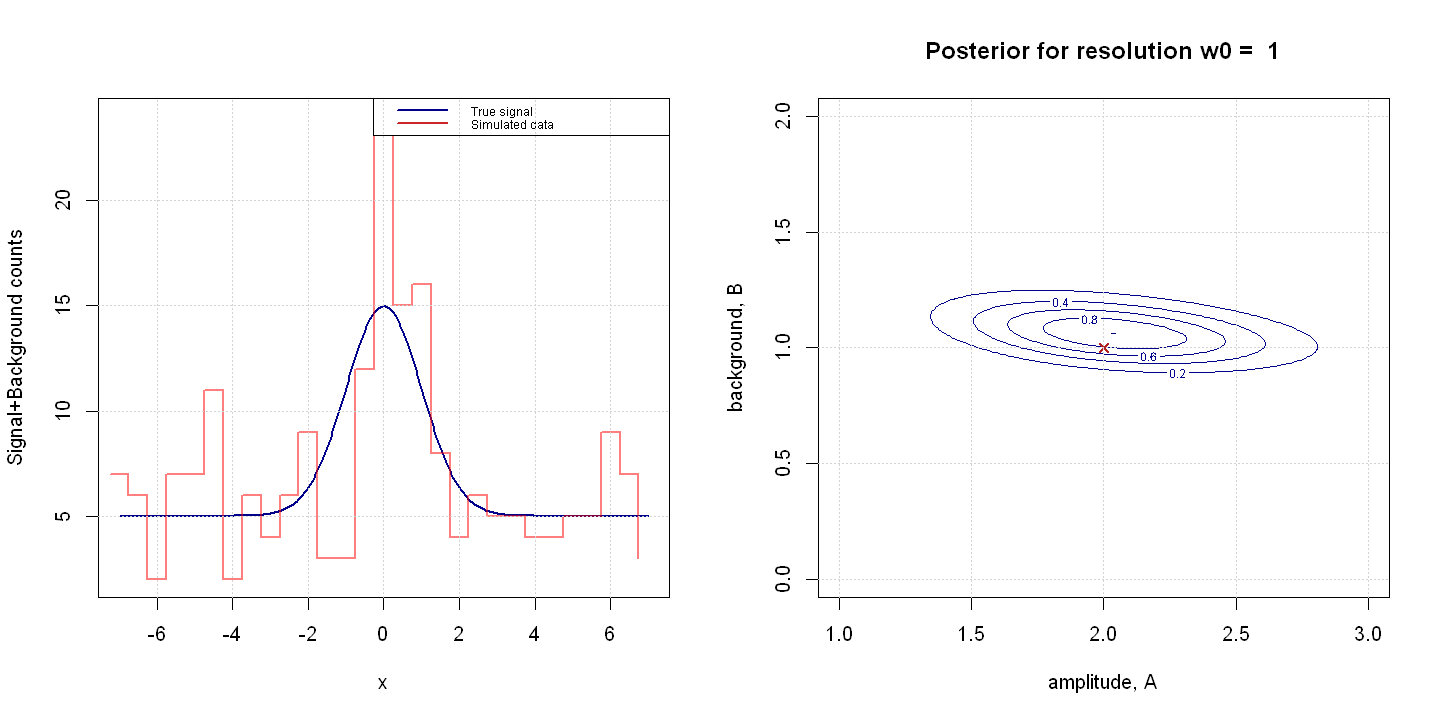

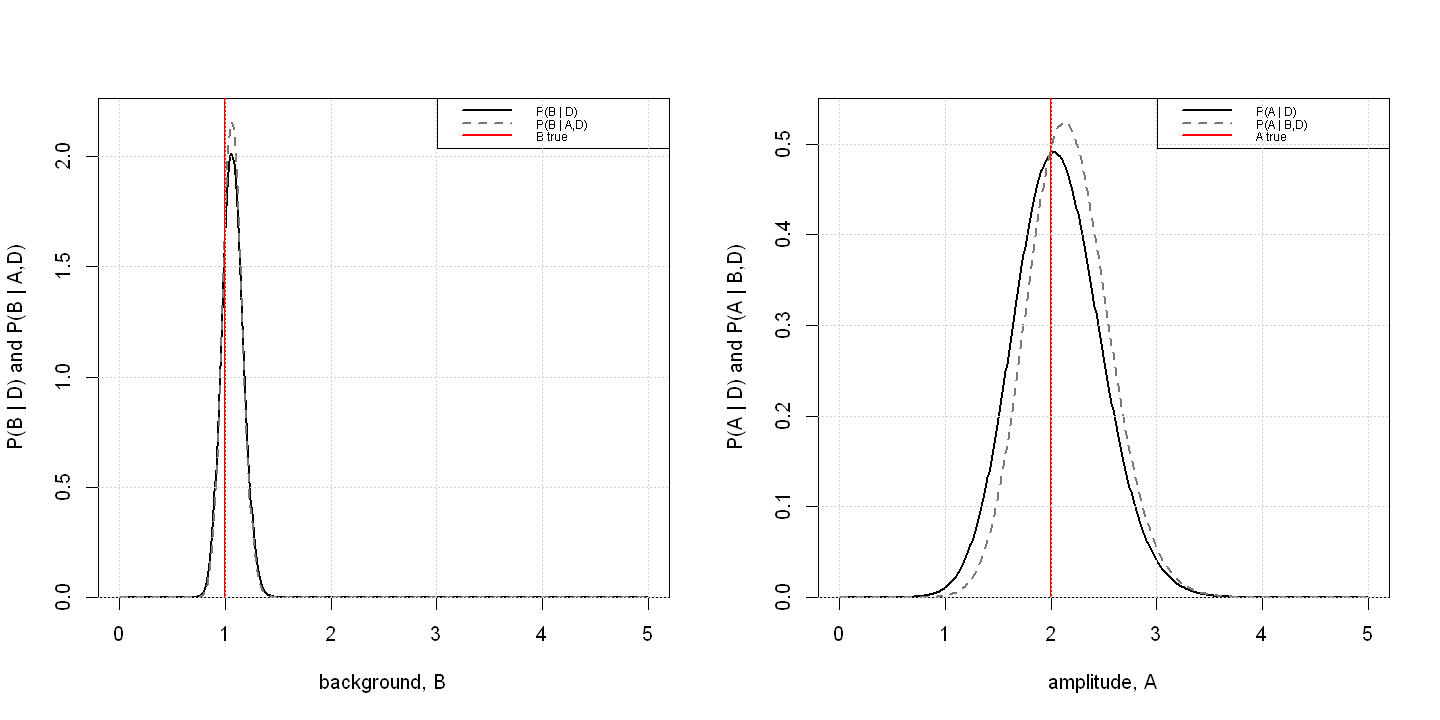

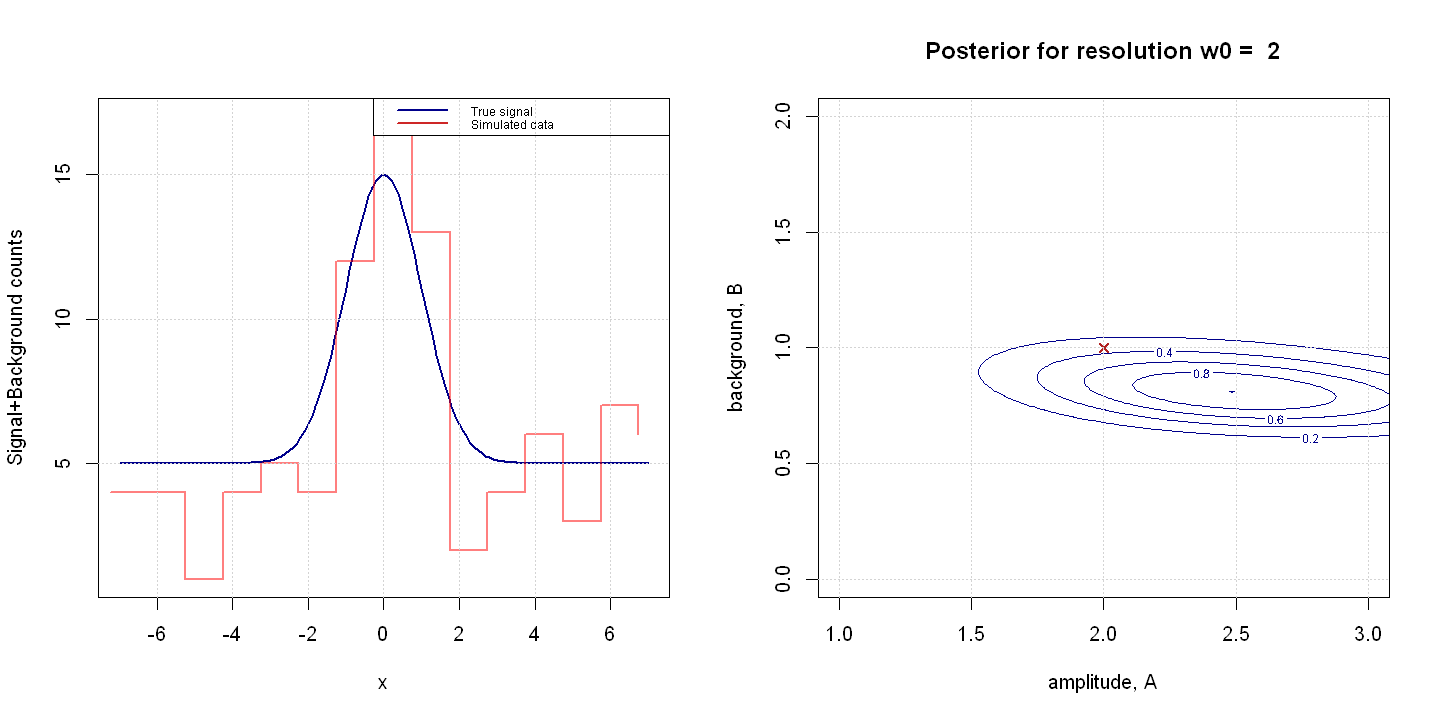

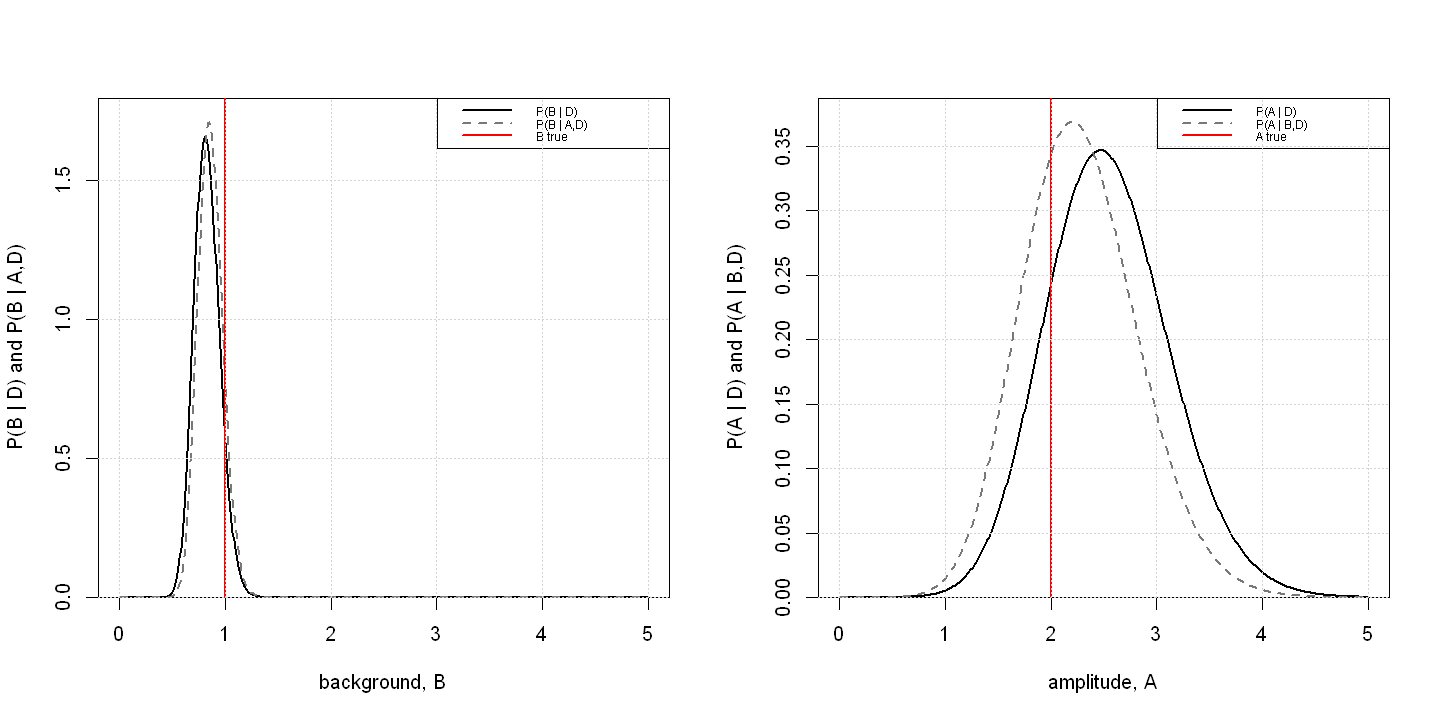

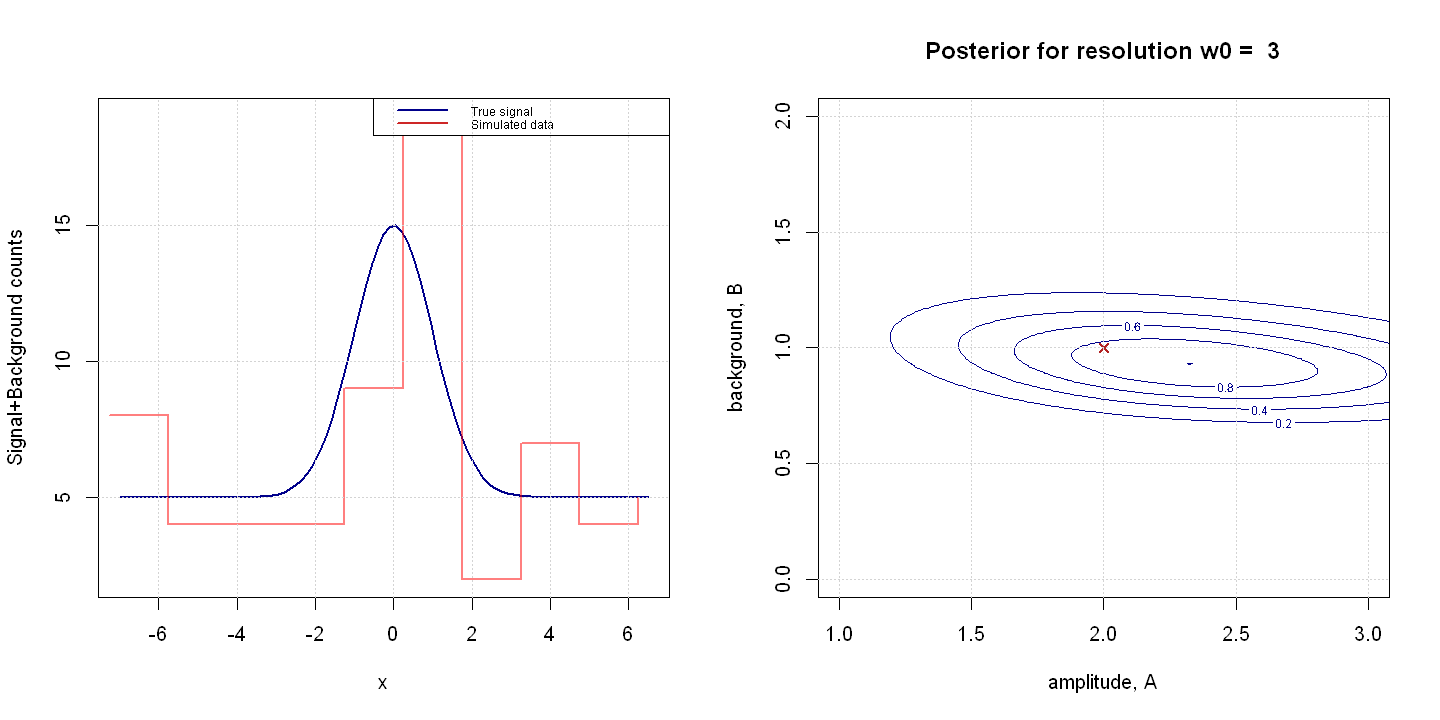

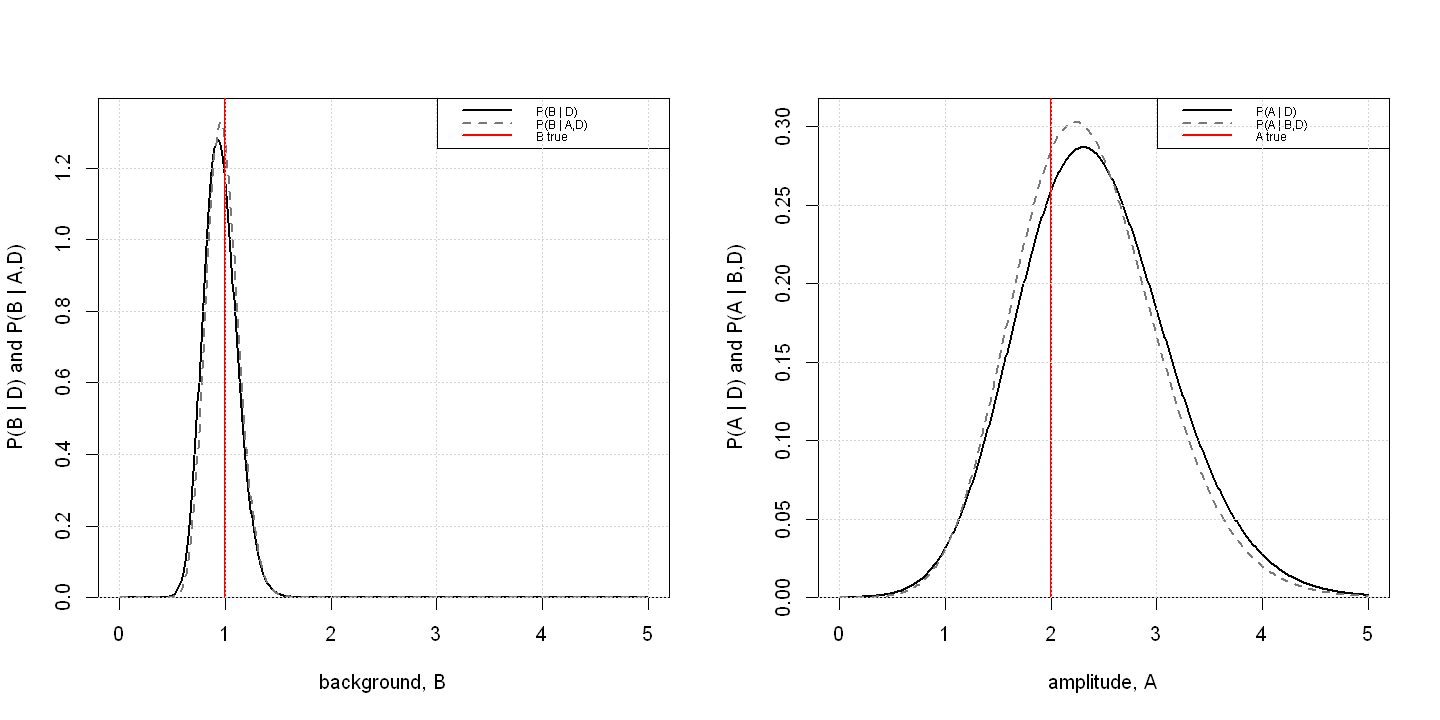

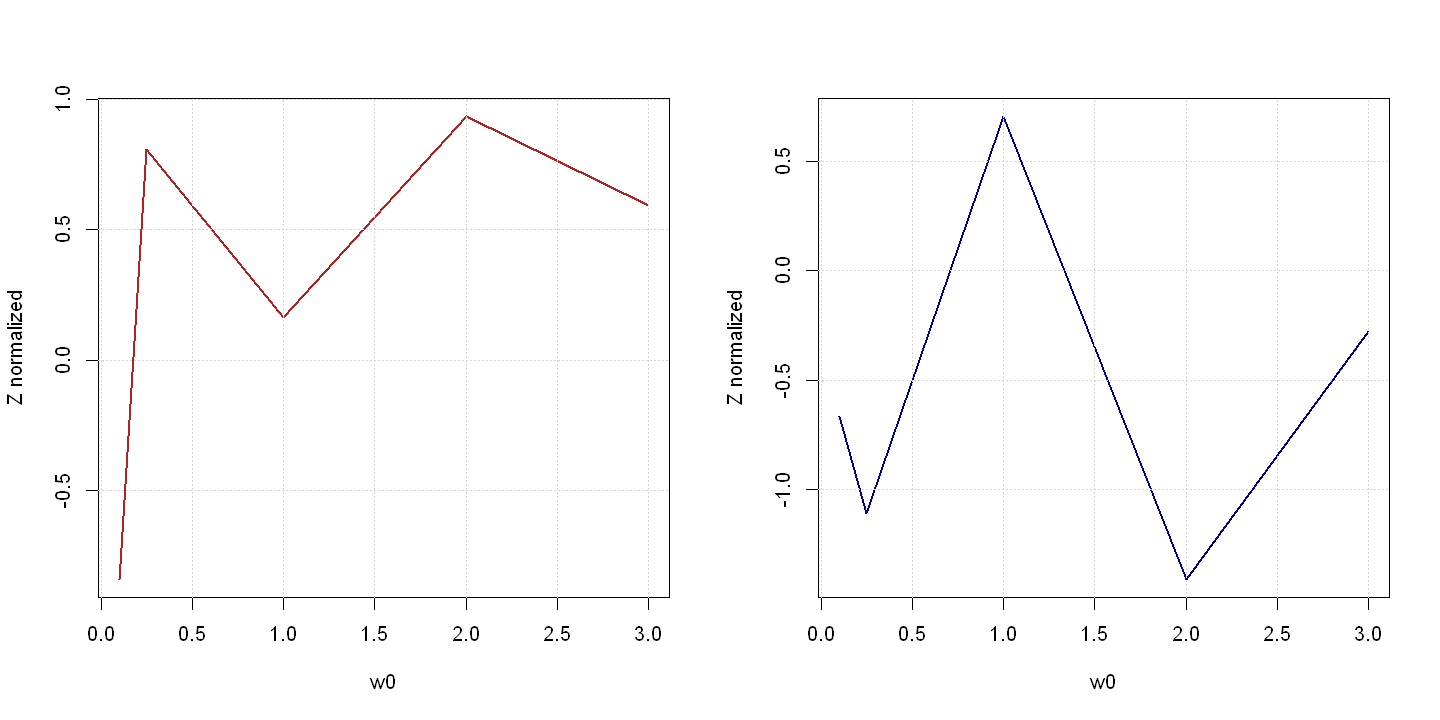

In [13]:
w0 <- c(0.1,0.25,1,2,3)
A.true = 2
B.true = 1 

par(mfrow=c(1,1))
options(repr.plot.width = 10, repr.plot.height = 5)

signal_background(w0, A.true = A.true, B.true = B.true)

### 3.2
Change the ratio $A/B$ used to simulate the data (keeping both positive in accordance with the prior)
- check the effect on the results

In [14]:
signal_background_AB <- function(A.true, B.true, ratio){
    x0 <- 0
    w <- 1
    Delta.t <- 5
    A_score = NULL
    B_score = NULL
    
    for (A.true in a_list){

        xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
        true_signal <- signal(xdat, A.true, B.true, x0, w, Delta.t)
        ddat <- rpois(length(true_signal), true_signal)
        N <- length(ddat)
        xdat.off <- xdat -0.25

        par(mfrow=c(1,2))
        options(repr.plot.width = 12, repr.plot.height = 6)

        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
        splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
        plot(xplot , splot, , type="l",col="blue4",lwd=2,lty=1,
        xlab="x", ylab="Signal+Background counts", xlim=range(xplot), ylim=range(c(splot, ddat)))
        lines(xdat.off, ddat , type='s',col = rgb(red = 1, green = 0, blue = 0, alpha = 0.5),
        lwd=2,lty=1)

        legend("topright", c("True signal", "Simulated data"), col=c('blue4','firebrick3'),
           lwd=2, lty=1, cex = 0.6)
        grid()

        n <- 500
        a <- seq(A.true - 2, A.true + 2, length.out = n)
        b <- seq(B.true - 2, B.true + 2, length.out = n)

        z <- matrix(data = NA , nrow = n, ncol = n)
            for(j in 1:n) {
                for(k in 1:n) {
                    z[j,k] <- log_post(ddat,xdat, a[j], b[k], x0, w, Delta.t)
                                }
                            }
        z <- z - max(z)

        contour(a, b, exp(z),nlevels = 5, xlab="amplitude, A",
        ylab="background, B", col='blue4', main=paste("Posterior for A/B =",A.true/B.true))
        points(A.true, B.true, pch=4, col='firebrick', lwd=2)
        grid()


        # Compute normalized marginalized posteriors , P(a|D) and P(b|D)
        # by summing over other parameter. Normalize by gridding.
        delta_a <- diff(c(0,10))/ n
        delta_b <- diff(c(0,10))/ n
        p_a_D <- apply(exp(z), 1, sum) #sum over rows
        p_a_D <- p_a_D/(delta_a * sum(p_a_D))
        p_b_D <- apply(exp(z), 2, sum) # sum over columns
        p_b_D <- p_b_D/(delta_b * sum(p_b_D))
        
        mean_a <- delta_a * sum(a * p_a_D)
        mean_b <- delta_b * sum(b * p_b_D)
        sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) )
        sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )

        za_test = (mean_a - A.true)/sd_a
        zb_test = (mean_b - B.true)/sd_b
        A_score = c(A_score, za_test)
        B_score = c(B_score, zb_test)


        # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
        # using true values of conditioned parameters. Vectorize(func , par)
        # makes a vectorized function out of func in the parameter par.
        p_a_bD <- exp( Vectorize (log_post , "a")(ddat , xdat , a, B.true ,
        x0, w, Delta.t))
        p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
        p_b_aD <- exp( Vectorize (log_post , "b")(ddat , xdat , A.true , b,
        x0, w, Delta.t))
        p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

        par(mfrow=c(1,2))
        options(repr.plot.width = 12, repr.plot.height = 6)

        # Plot the 1D marginalized posteriors
        plot(b, p_b_D, xlab="background, B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
        type="l", lwd=2,col = 'black')
        lines(b, p_b_aD , lwd=2, lty=2, col = 'gray47')
        abline(v=B.true , col="red", lty = 1, lwd = 2)
        legend("topright", c("P(B | D)", "P(B | A,D)", 'B true'), col=c('black','gray47', 'red'),
        lwd=2, lty=c(1,2),cex = 0.6)
        grid()

        plot(a, p_a_D, xlab="amplitude, A", yaxs="i",
        ylim = 1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
        type="l", lwd=2,col = 'black')
        lines(a, p_a_bD , lwd=2, lty=2, col = 'gray47')
        abline(v=A.true , col="red", lty = 1, lwd = 2)
        legend("topright", c("P(A | D)", "P(A | B,D)" , 'A true'), col=c('black','gray47', 'red'),
        lwd=2, lty=c(1,2, 1),cex = 0.6)
        grid()
        }
    plot(ratio, A_score, type="l",col="firebrick",lwd=2,lty=1,
    ylab="Z normalized", xlab = 'A/B')
    grid()
    plot(ratio, B_score, type="l",col="blue4",lwd=2,lty=1,
    ylab="Z normalized", xlab = 'A/B')
    grid()
}

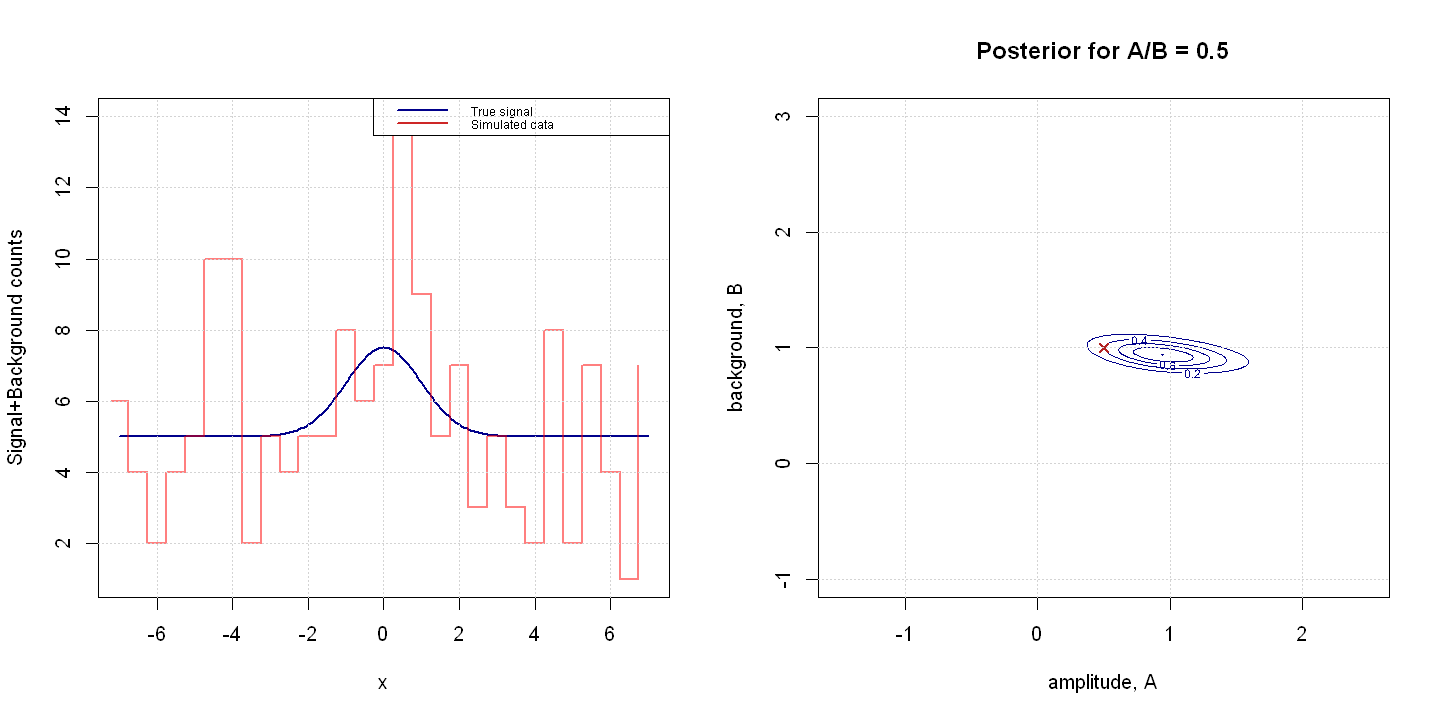

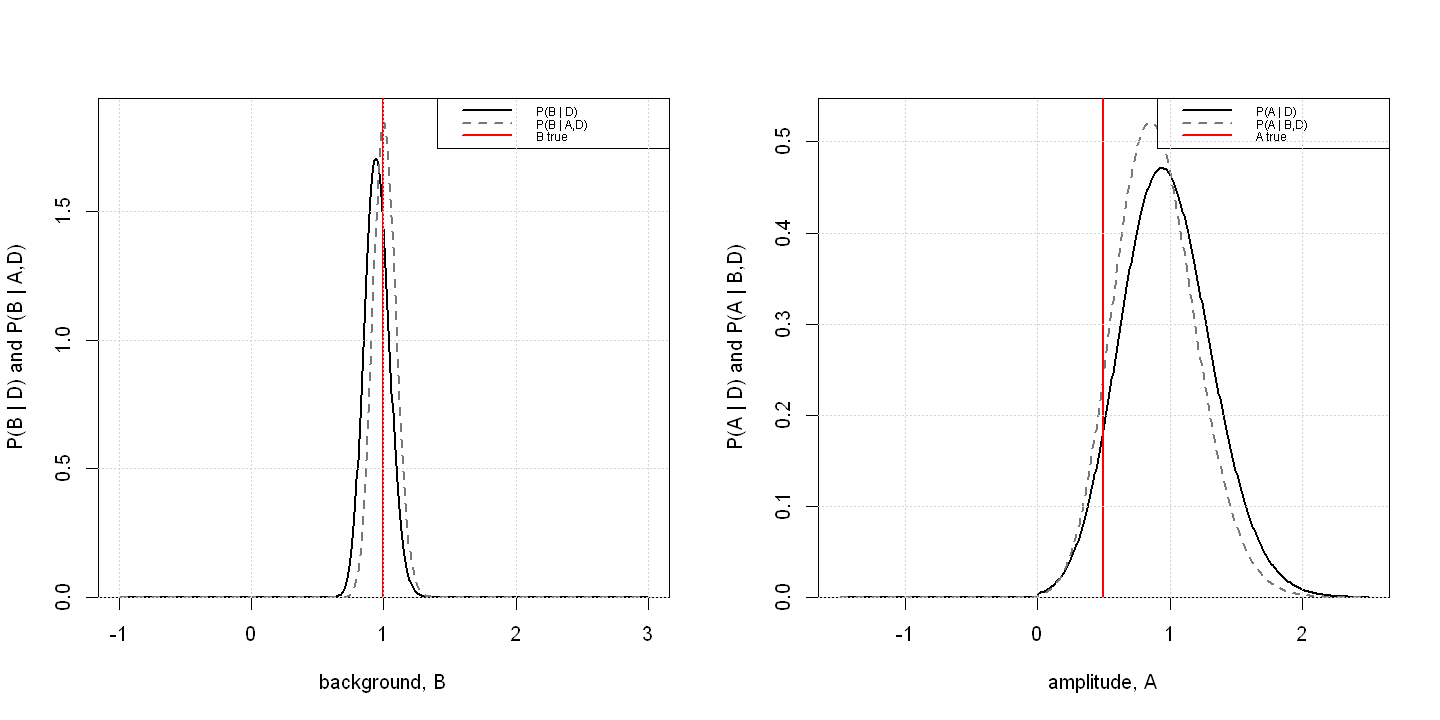

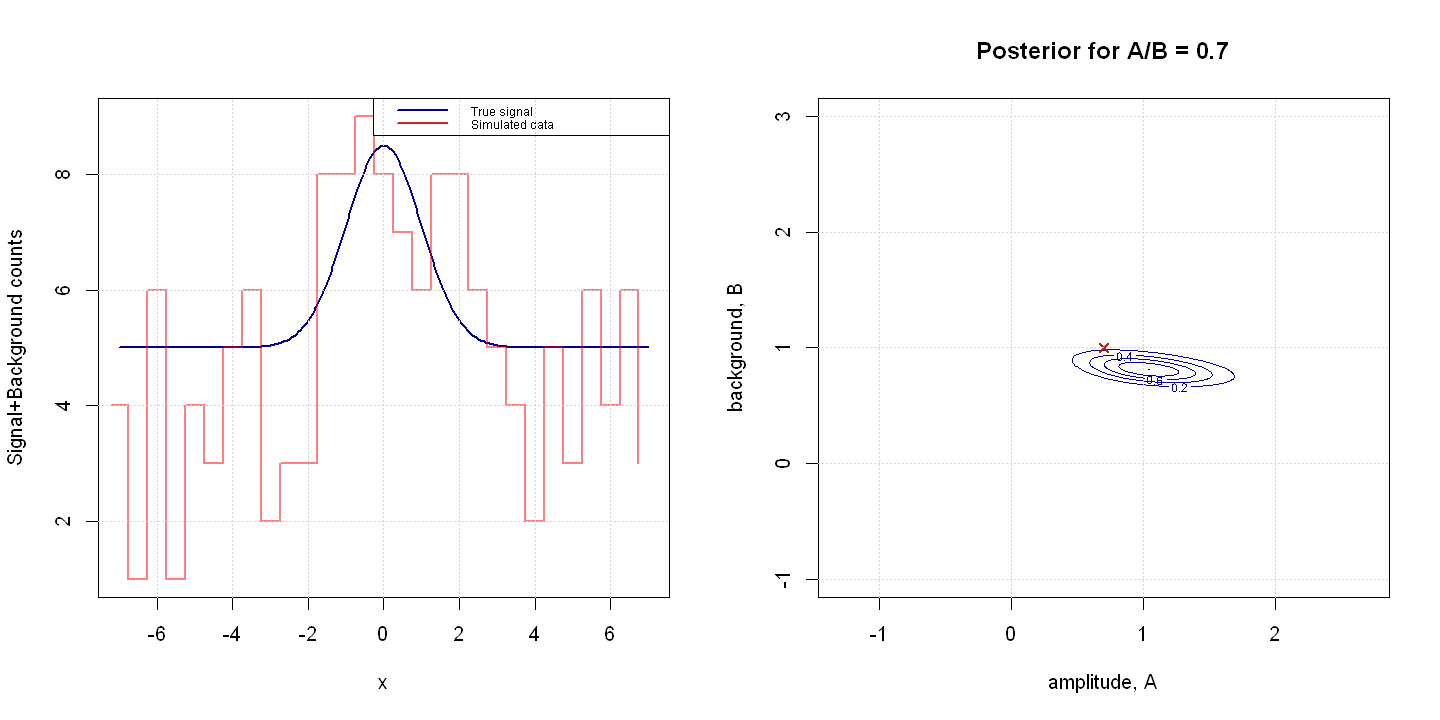

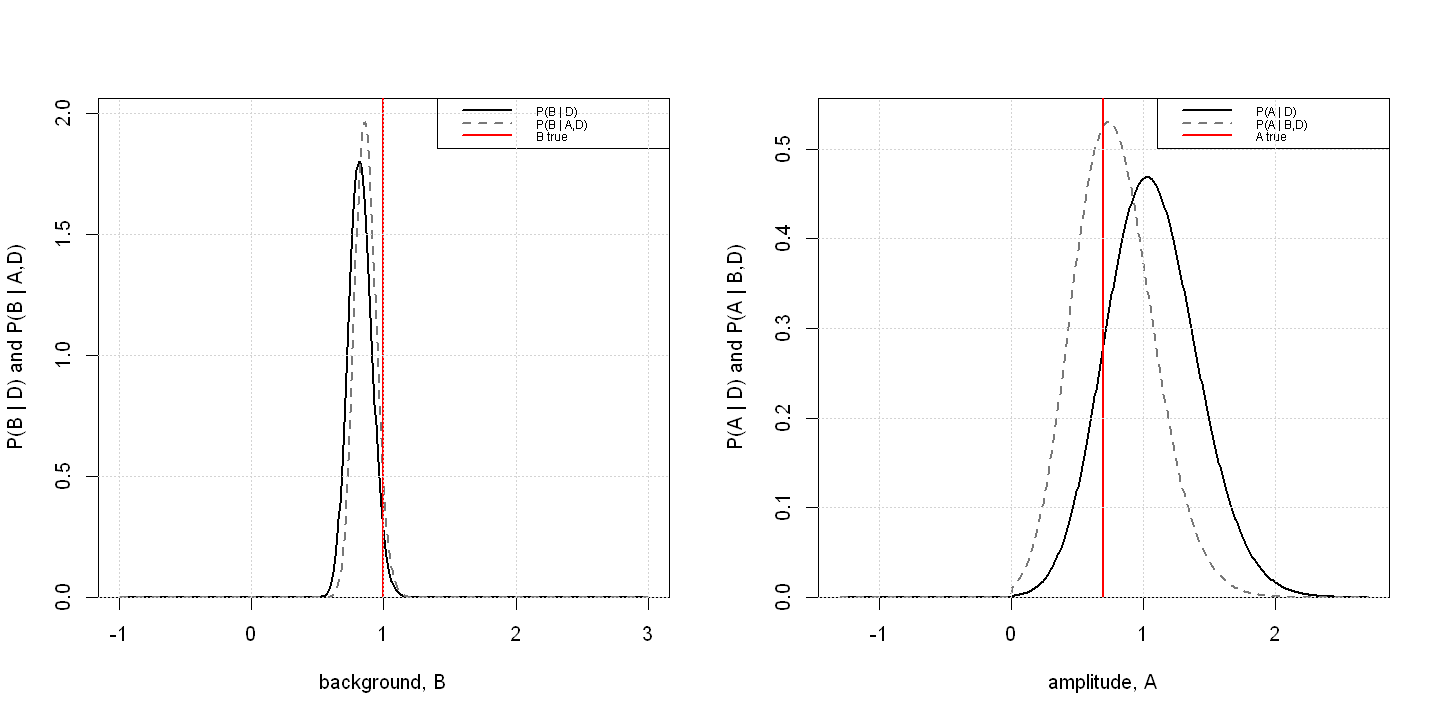

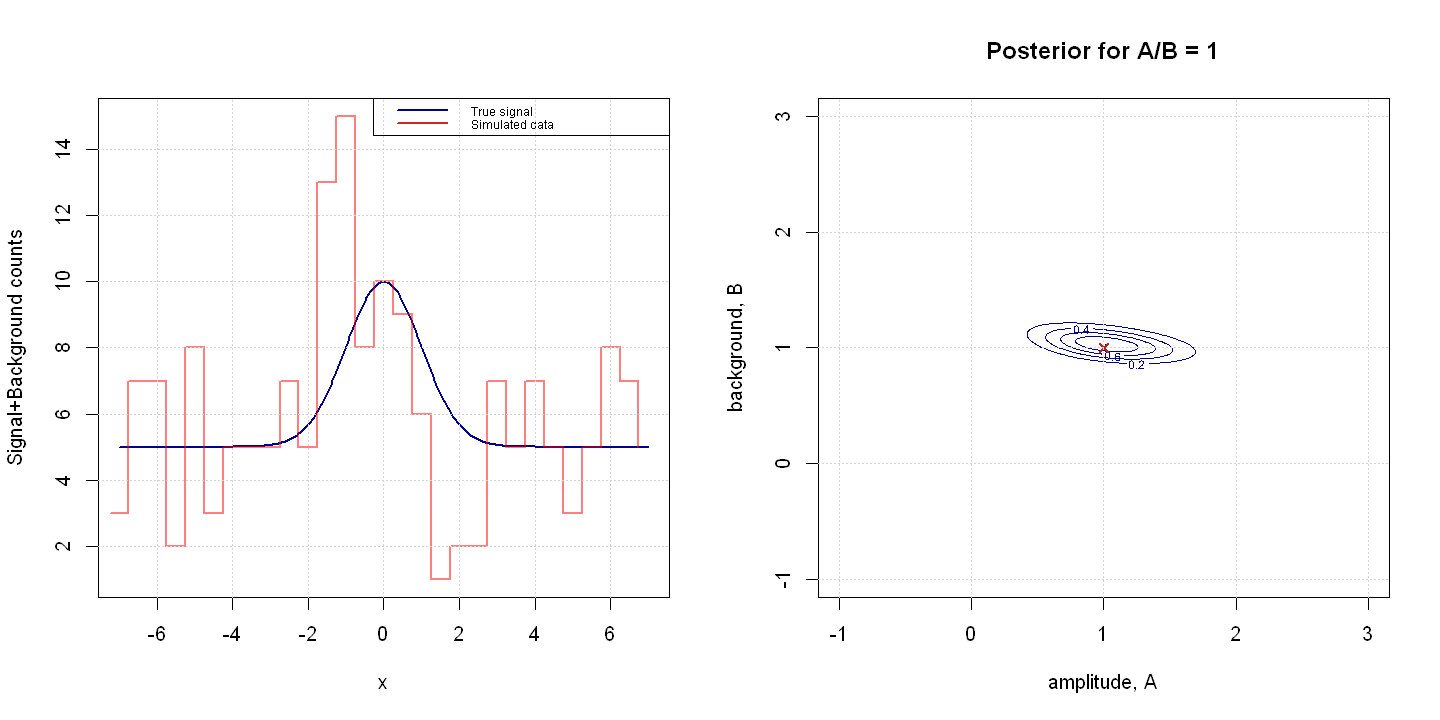

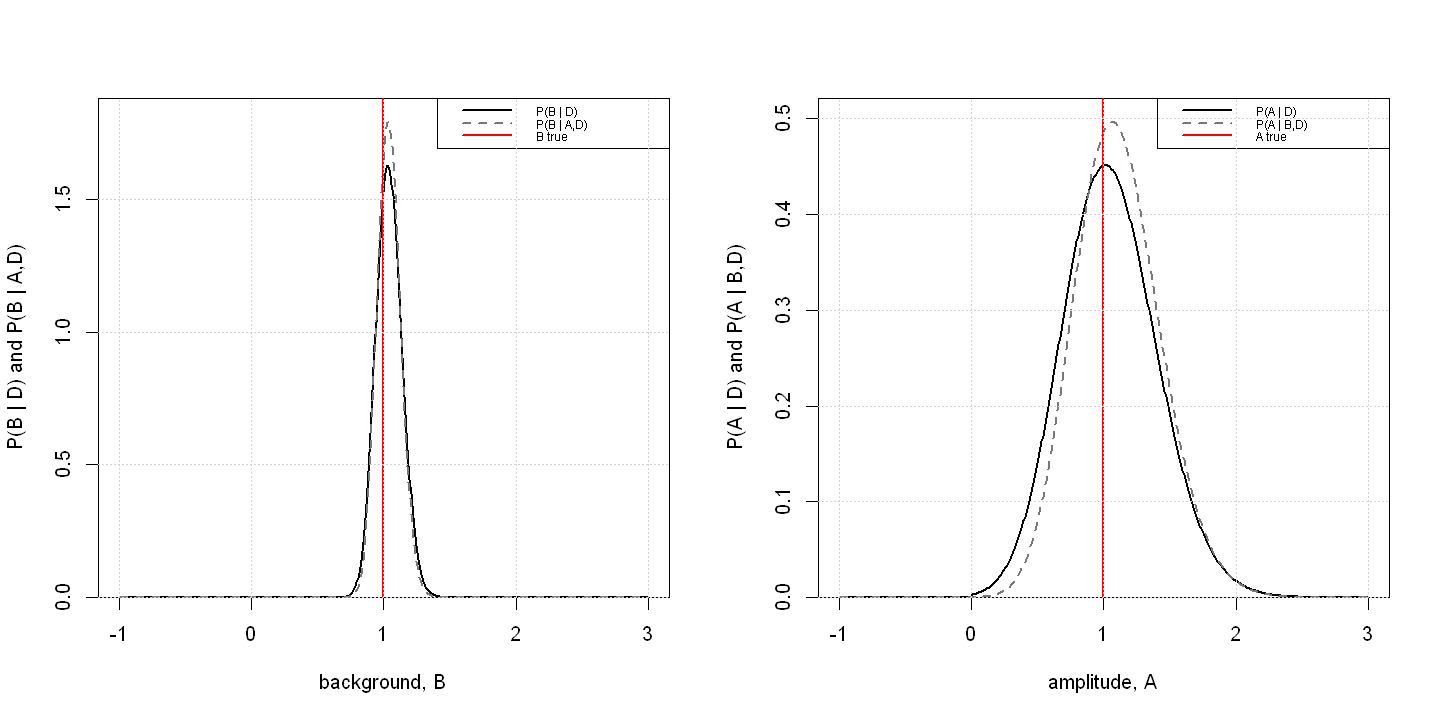

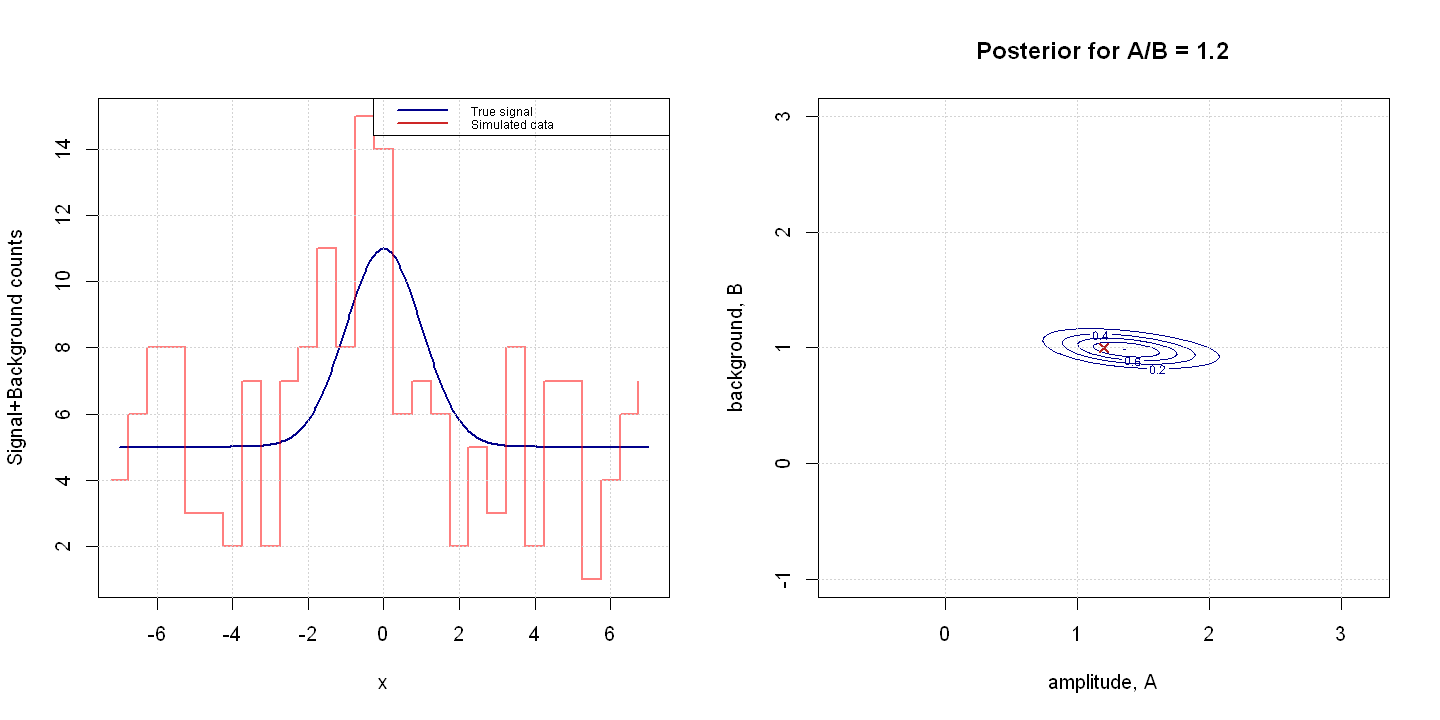

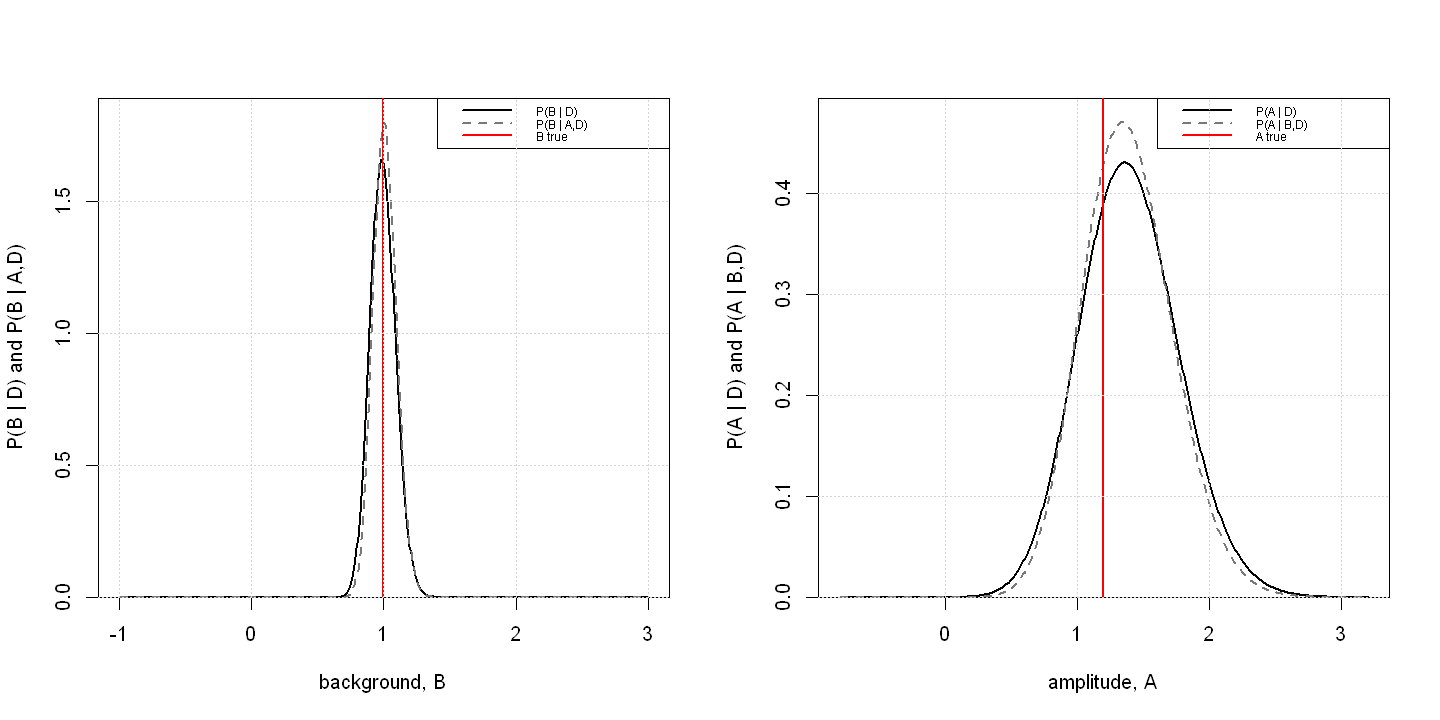

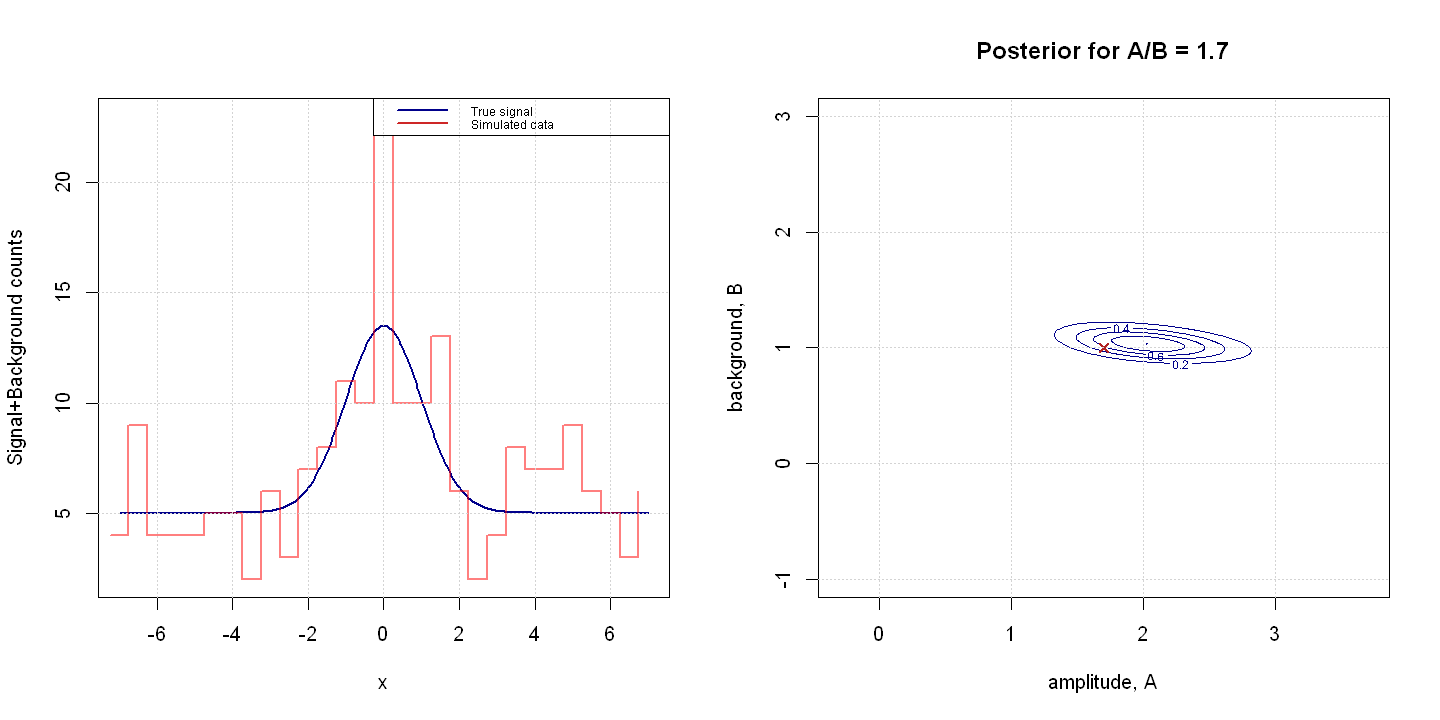

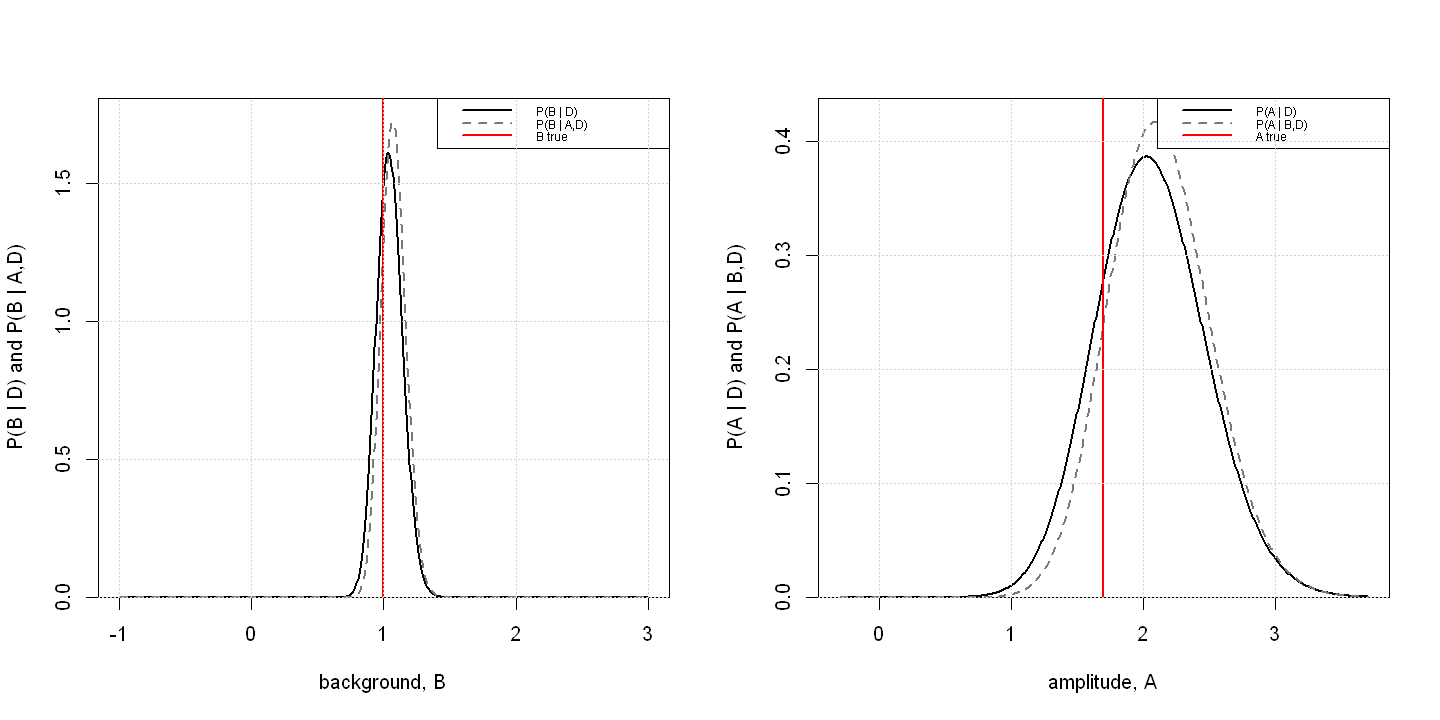

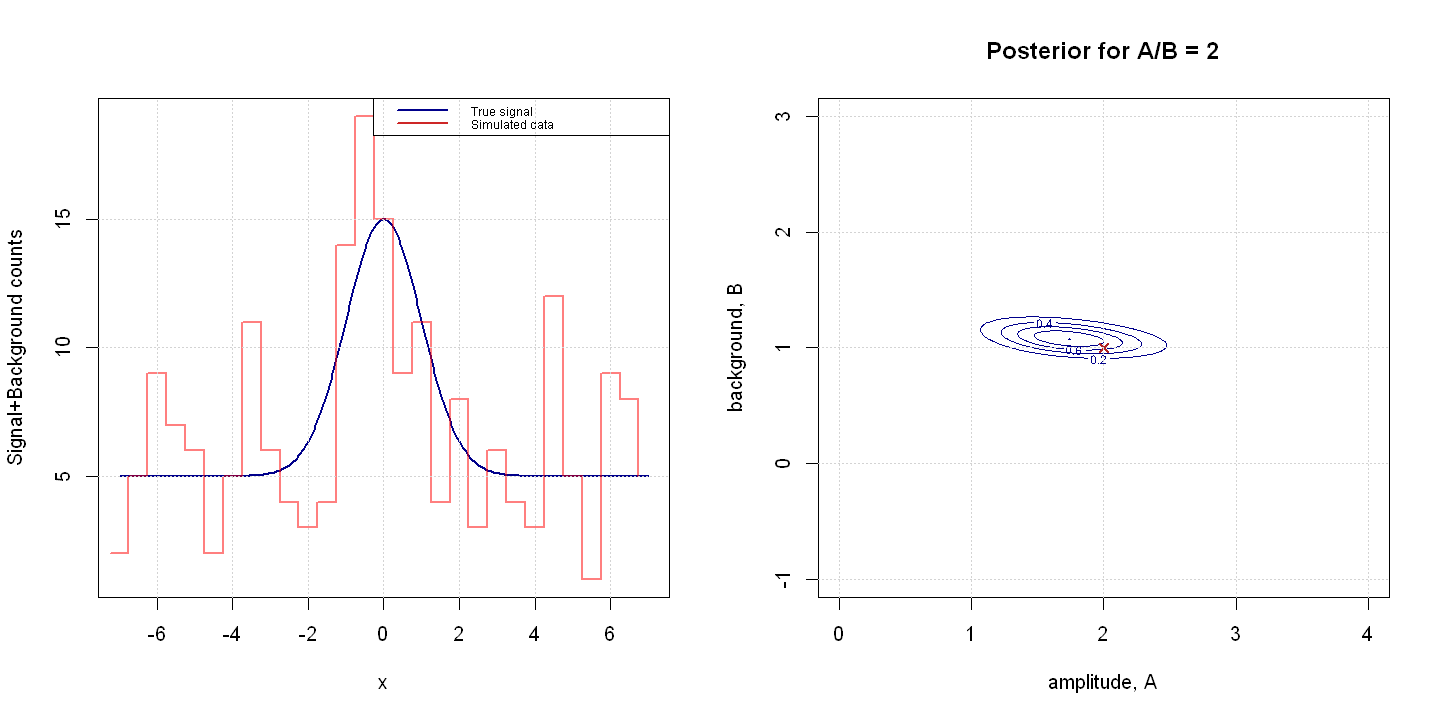

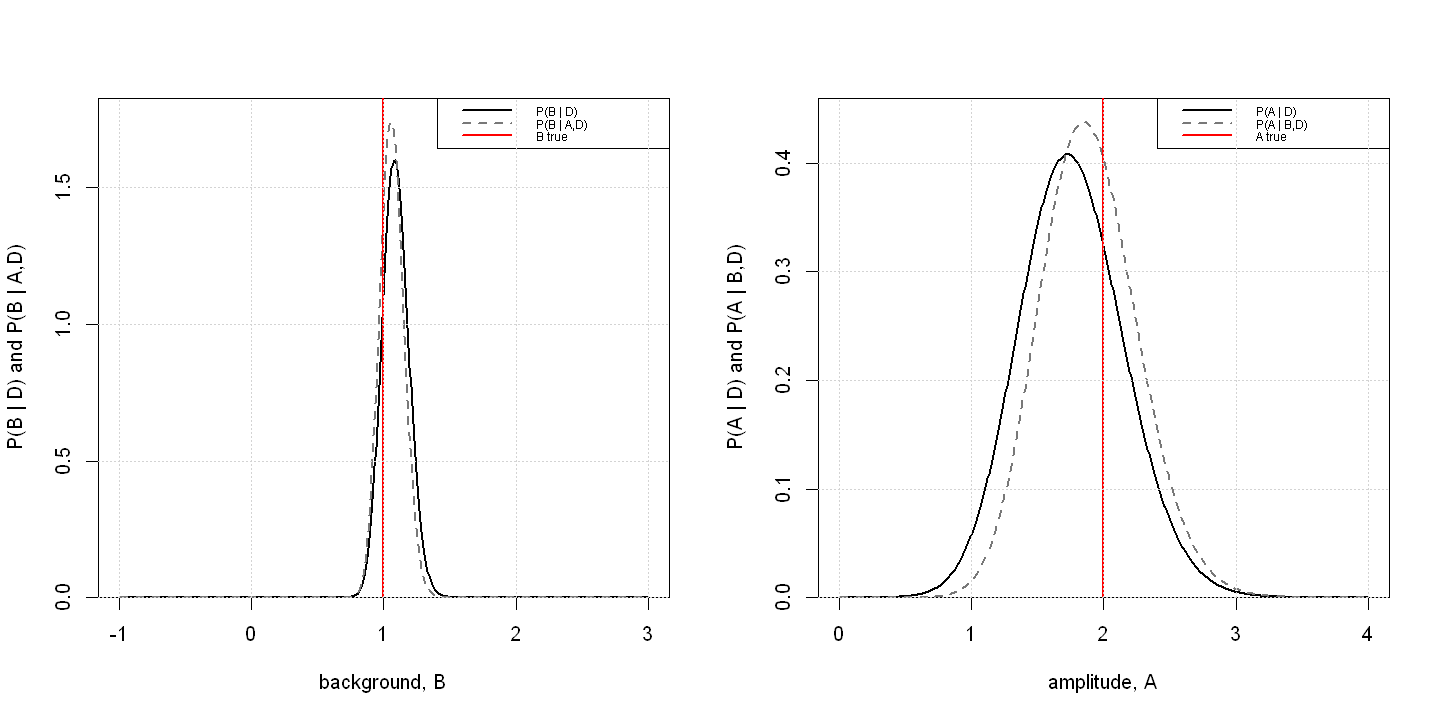

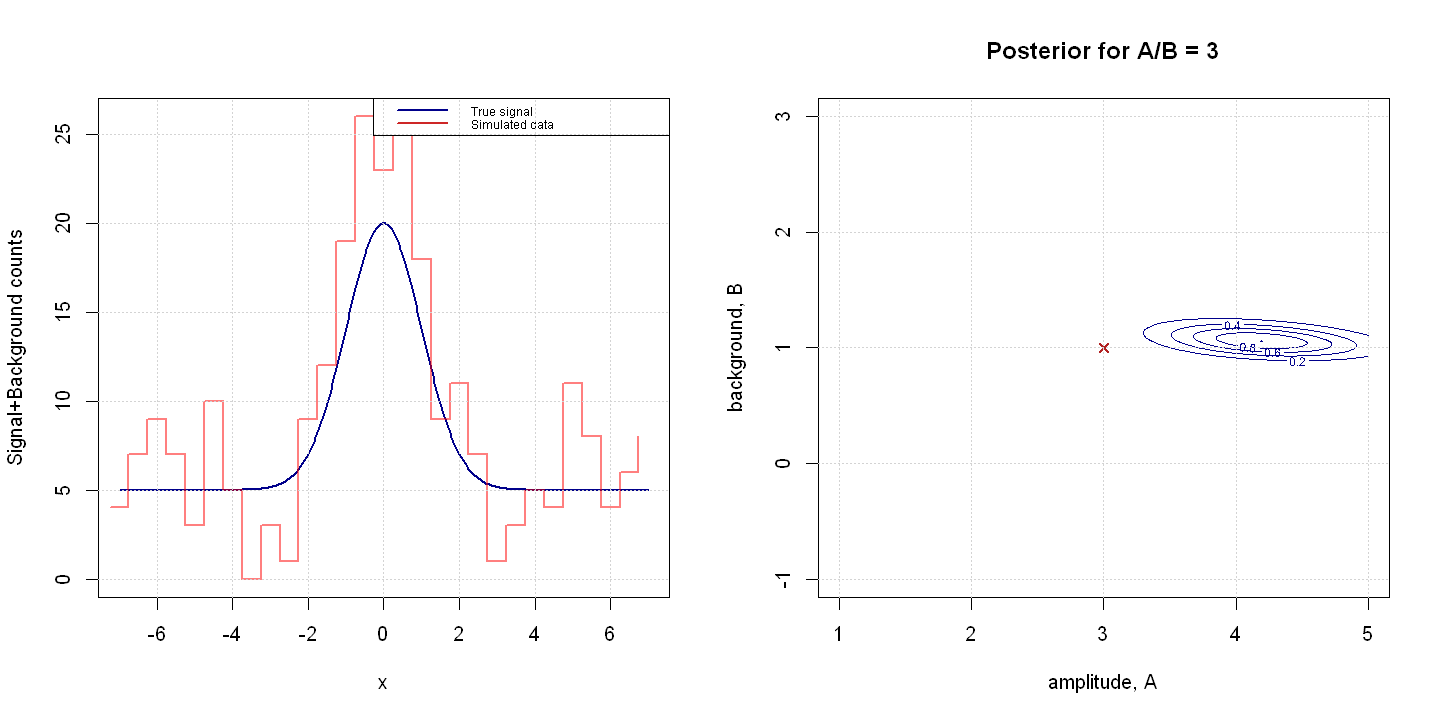

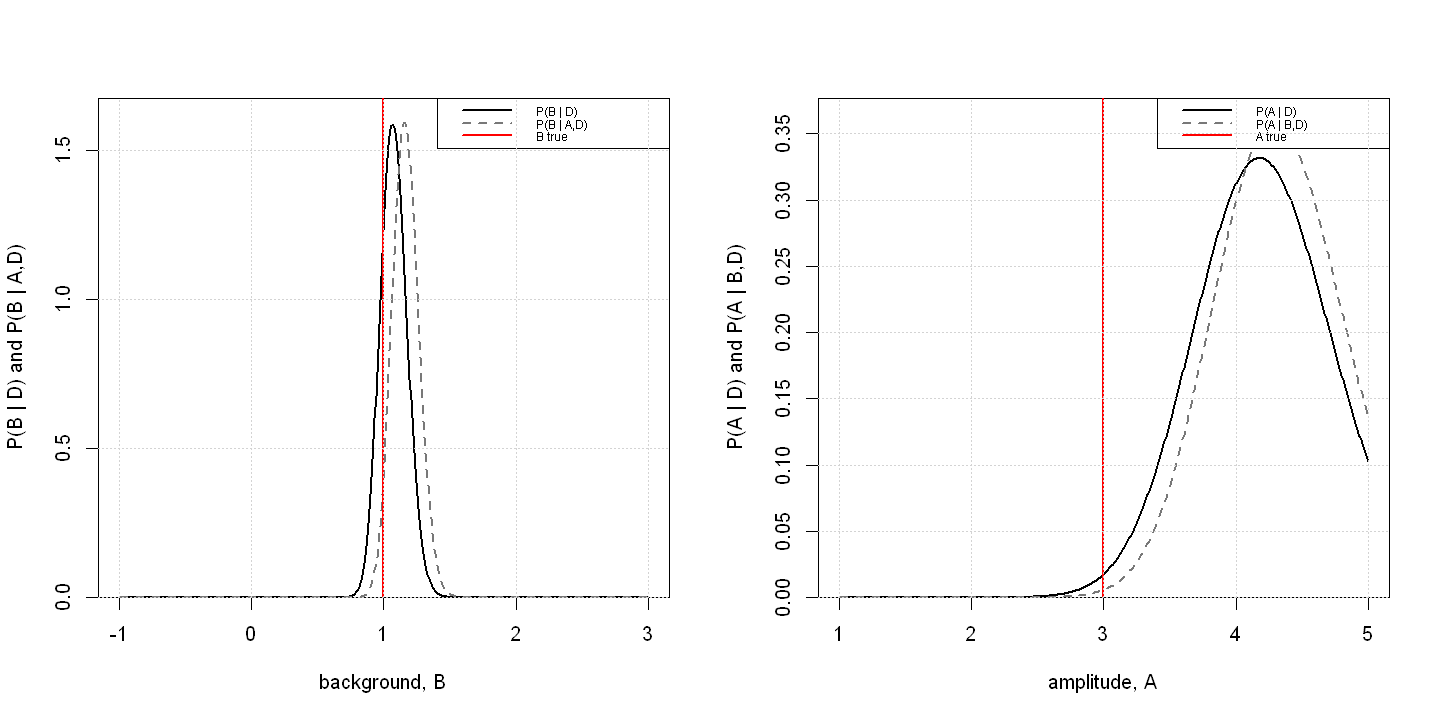

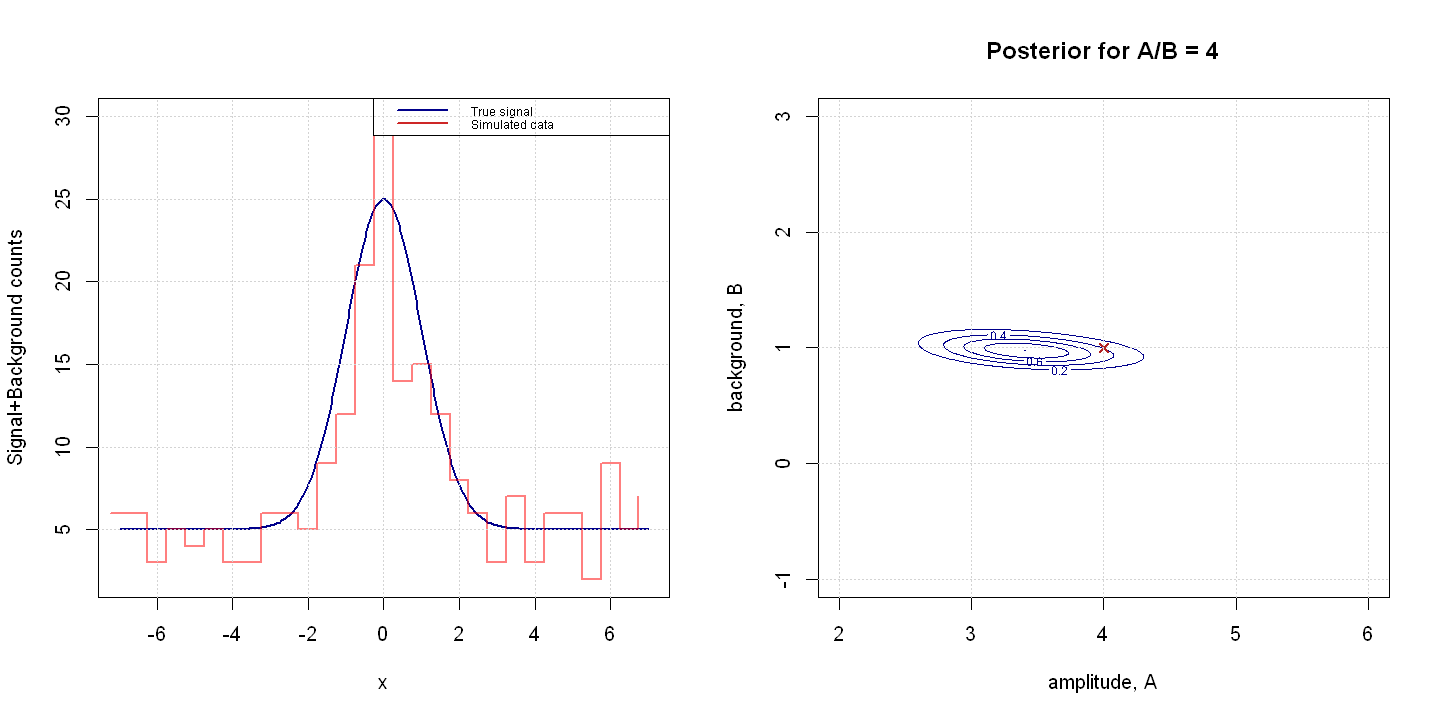

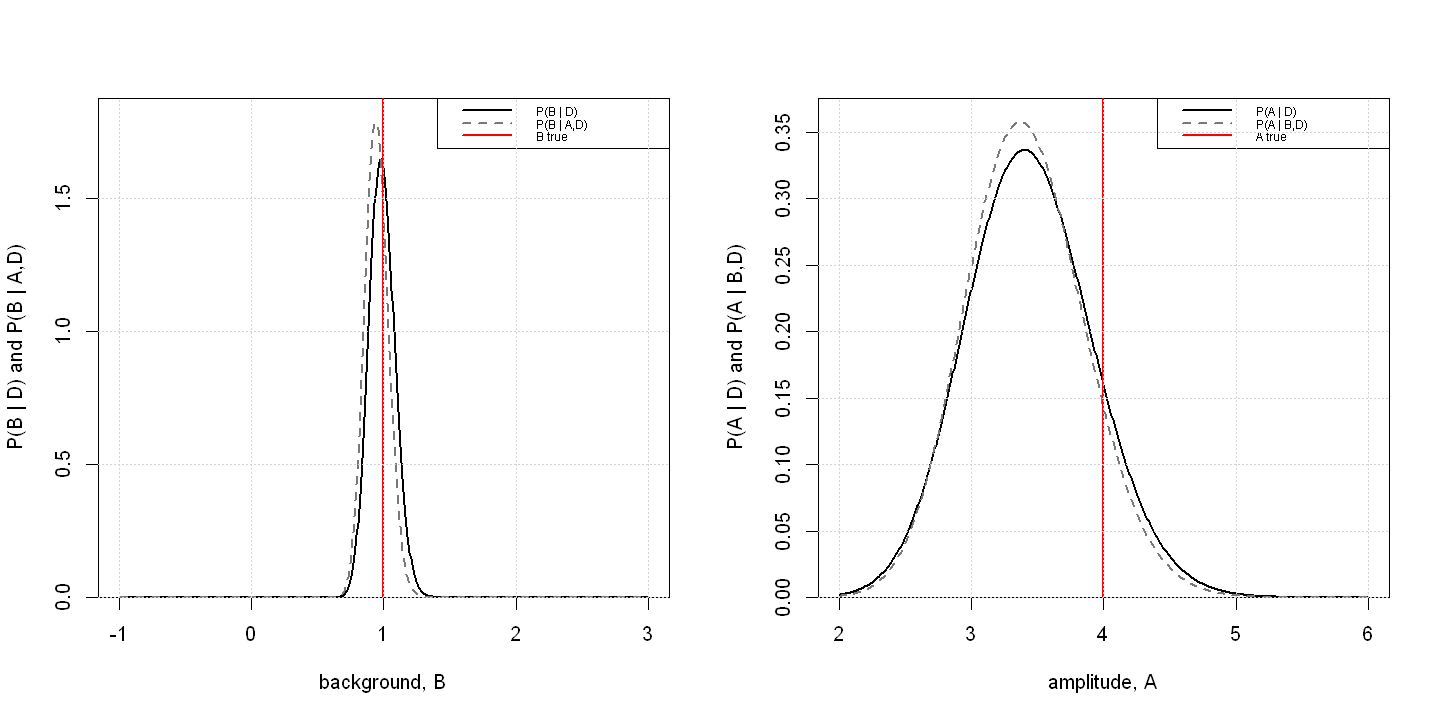

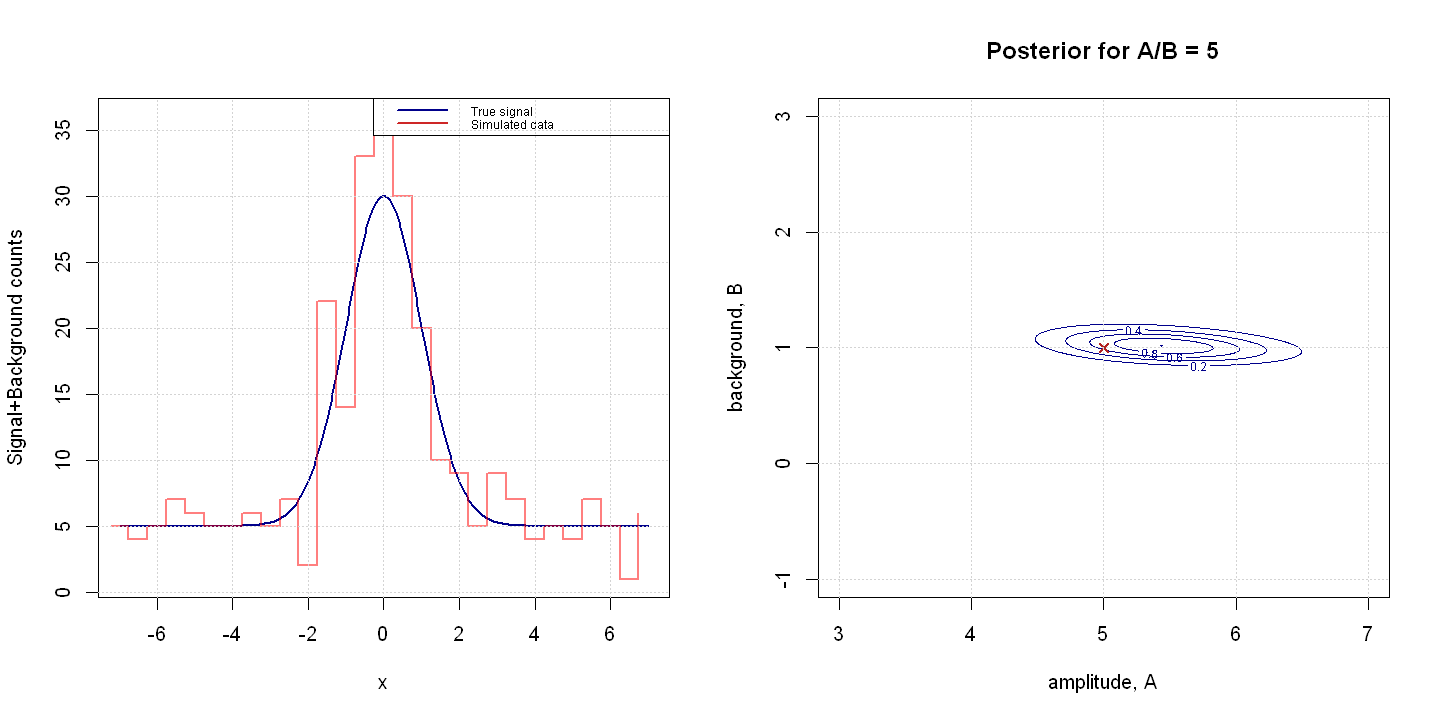

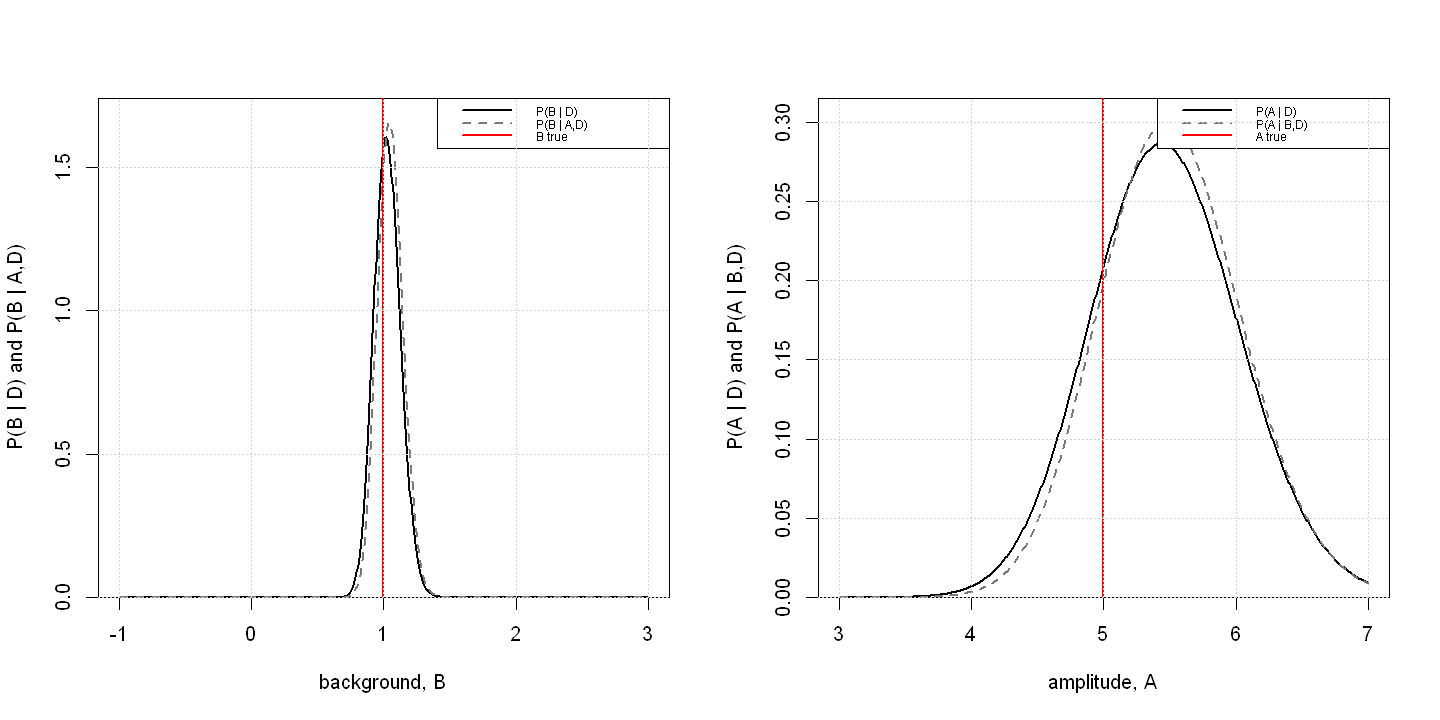

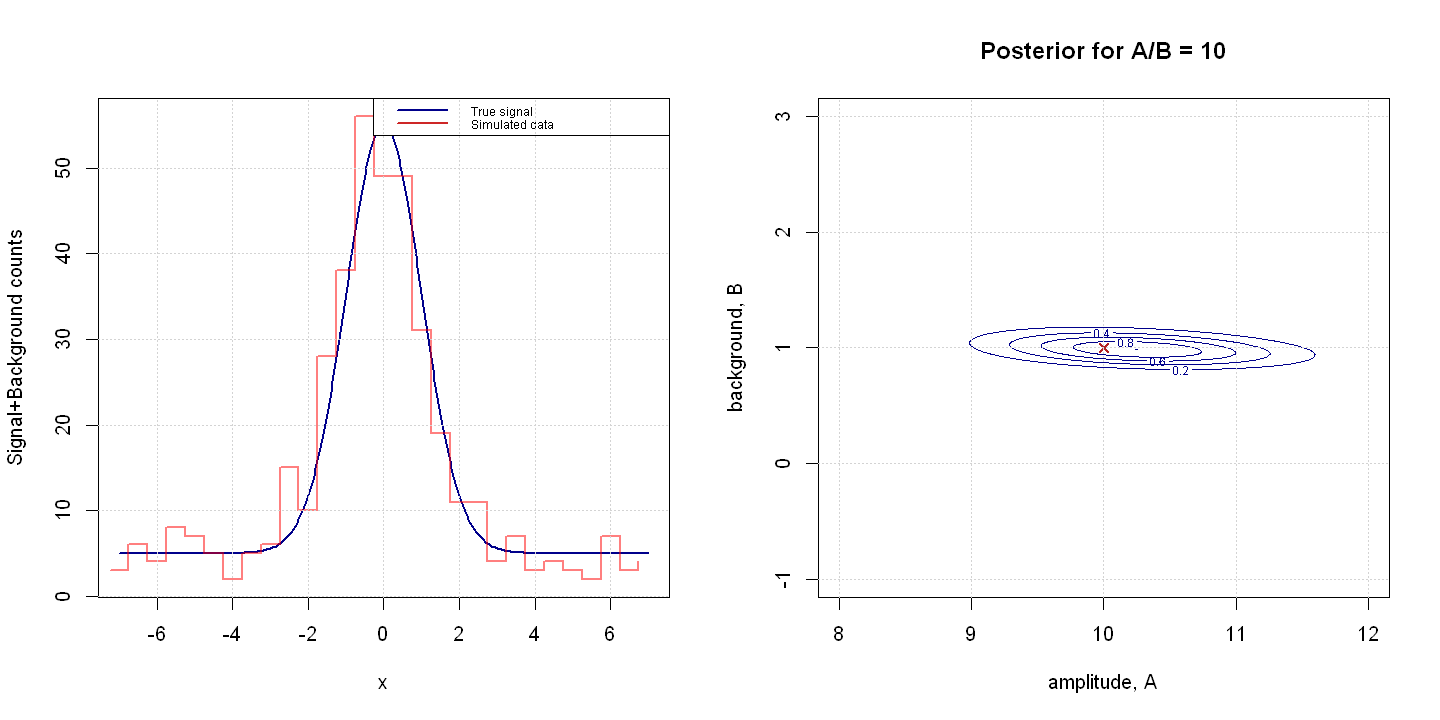

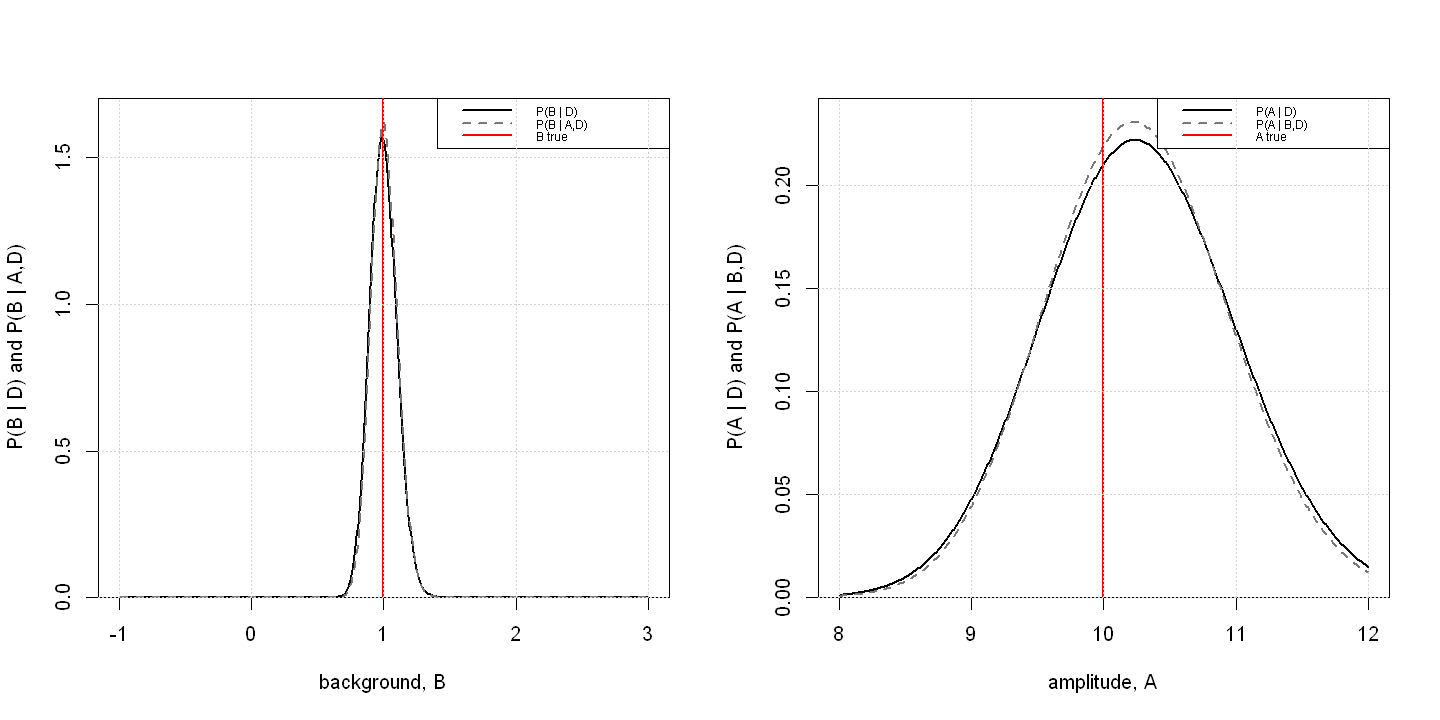

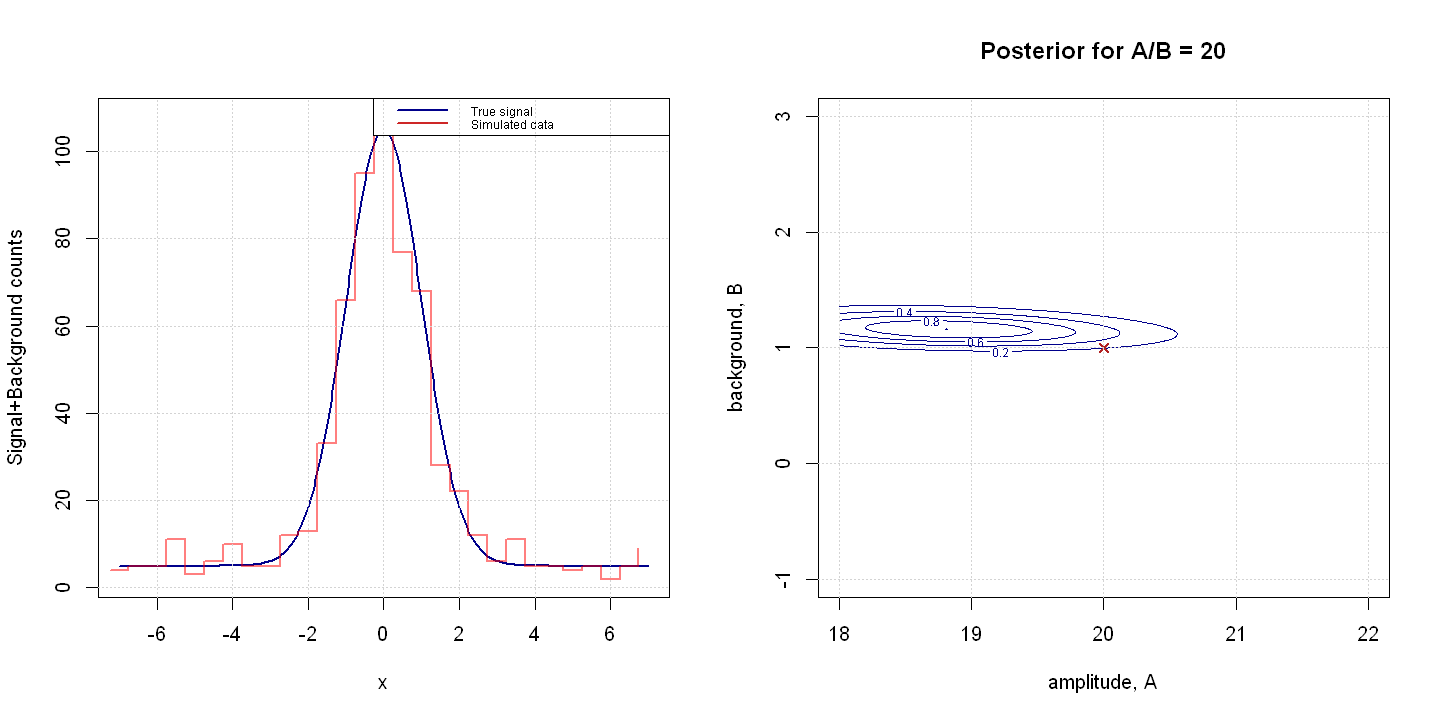

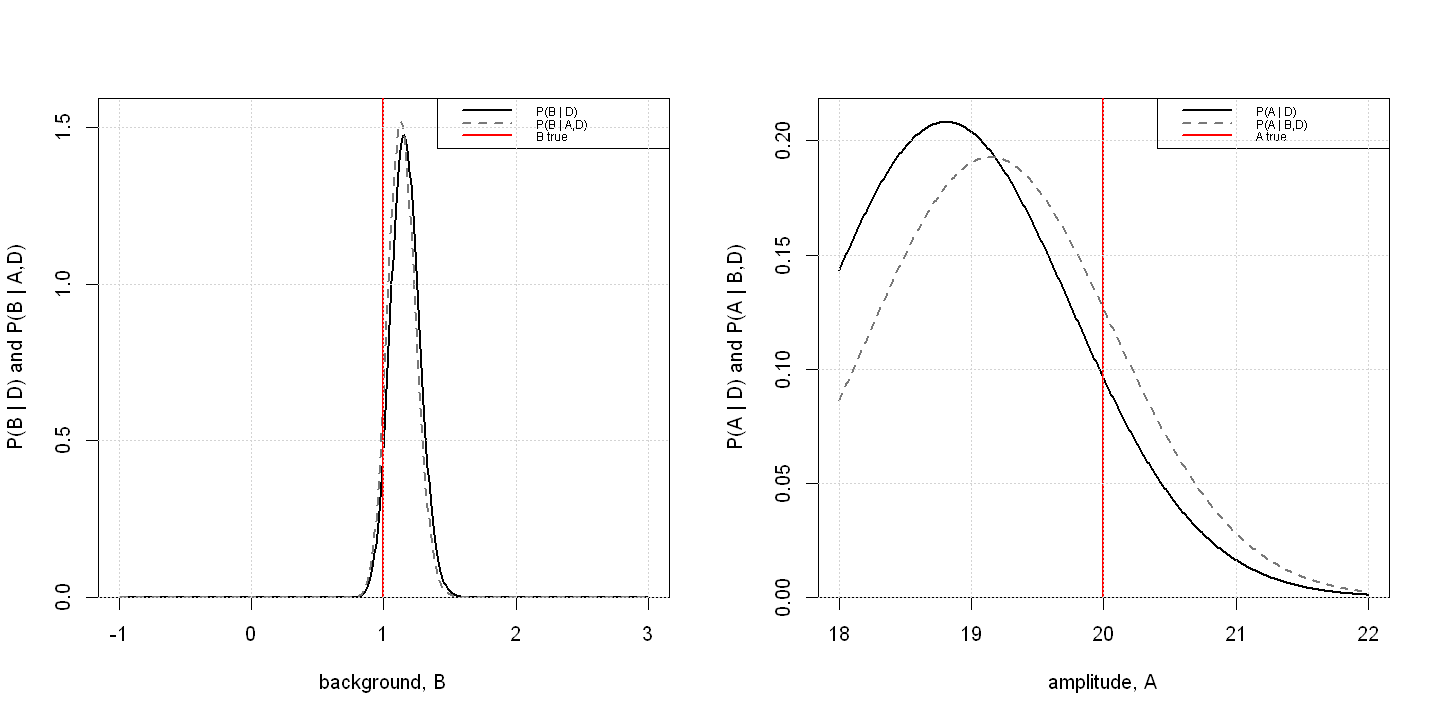

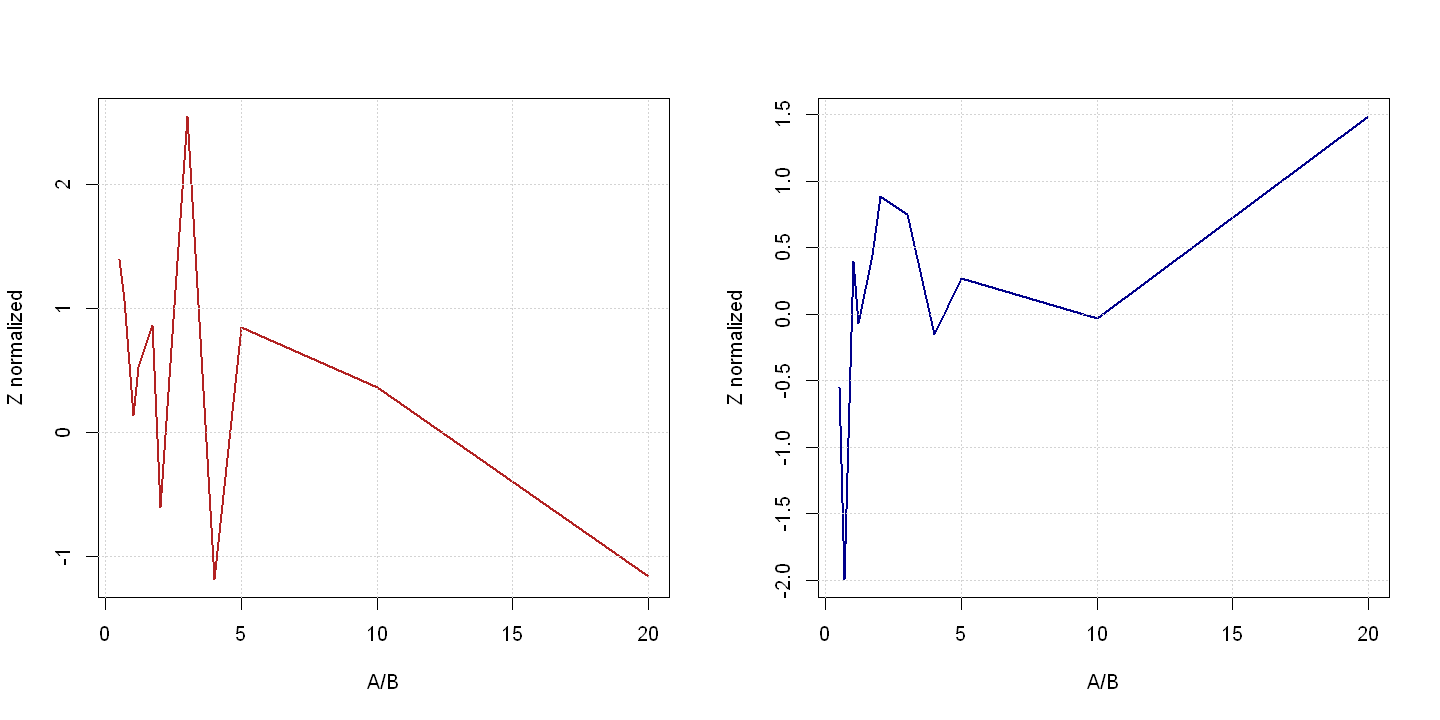

In [15]:
ratio <- c(0.5,0.7,1,1.2,1.7,2,3,4,5,10,20)
b_list <- 1
a_list <- ratio * B.true

par(mfrow=c(1,1))
options(repr.plot.width = 10, repr.plot.height = 5)

signal_background_AB(A.true = a_list, B.true = b_list, ratio = ratio)